# Project e-commerce by Natalie Swan

Вопросы, решаемые этой частью кода:

1. EDA
2. Количество пользователей, совершивших покупку только один раз.
3. Сколько заказов в месяц в среднем не доставляется по разным причинам? Вывести детализацию по причинам).
4. По каждому товару определить, в какой день недели товар чаще всего покупается.
5. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [62]:
# import required libraries

import pandas as pd
import datetime as dt
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

pd.options.mode.copy_on_write = True

In [63]:
# chart setting

sns.set(
    font_scale=1,
    rc={'figure.figsize':(20,10)}
        )

## EDA

Для начала откроем имеющиеся файлы с данными (3) и проведём предварительный анализ

### Таблица с уникальными идентификаторами пользователей

In [13]:
customers = pd.read_csv('olist_customers_dataset.csv')
customers

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

In [4]:
# customer_id — позаказный идентификатор пользователя
# customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
# customer_zip_code_prefix —  почтовый индекс пользователя
# customer_city —  город доставки пользователя
# customer_state —  штат доставки пользователя

customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [5]:
# пустых ячеек нет

customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
customers.customer_unique_id.nunique()

96096

In [14]:
customers.customer_unique_id.count()

99441

In [15]:
customers.customer_id.nunique()

99441

customer_id в датафрейме не повторяются, customer_unique_id повторяются, потому что customer_unique_id может соответствовать нескольким customer_id.

In [16]:
print(customers.customer_state.unique())
print(customers.customer_state.nunique())

['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']
27


In [17]:
customers.customer_city.nunique()

4119

Заказы делались из 27 штатов и из 4119 городов. Судя по названиям городов и сокращениям штатов - это Бразилия, где всего 26 штатов и 1 округ.

### Товарные позиции, входящие в заказы

In [14]:
items = pd.read_csv('olist_order_items_dataset.csv')
items

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

* order_id —  уникальный идентификатор заказа (номер чека)
* order_item_id —  идентификатор товара внутри одного заказа
* product_id —  ид товара (аналог штрихкода)
* seller_id — ид производителя товара
* shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
* price —  цена за единицу товара
* freight_value —  вес товара


In [20]:
# Пример структуры данных: 

items[items.order_id == "00143d0f86d6fbd9f9b38ab440ac16f5"]

order_id  order_item_id  \
32  00143d0f86d6fbd9f9b38ab440ac16f5              1   
33  00143d0f86d6fbd9f9b38ab440ac16f5              2   
34  00143d0f86d6fbd9f9b38ab440ac16f5              3   

                          product_id                         seller_id  \
32  e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
33  e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
34  e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   

   shipping_limit_date  price  freight_value  
32 2017-10-20 16:07:52  21.33           15.1  
33 2017-10-20 16:07:52  21.33           15.1  
34 2017-10-20 16:07:52  21.33           15.1

Одна строчка - 1 товар. Если товар заказан в количестве, например, 3 шт., то будет 3 строчки с одним id заказа и одним и тем же id товара. 

In [27]:
items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

Имеем 3 тысячи продавцов на почти 33 тысячи наименований товаров. 

In [20]:
#Пустых ячеек нет
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [21]:
items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [15]:
# Переведём shipping_limit_date в datetime

items.shipping_limit_date = pd.to_datetime(items.shipping_limit_date)
items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [28]:
items.describe()

order_item_id            shipping_limit_date          price  \
count  112650.000000                         112650  112650.000000   
mean        1.197834  2018-01-07 15:36:52.192685312     120.653739   
min         1.000000            2016-09-19 00:15:34       0.850000   
25%         1.000000     2017-09-20 20:57:27.500000      39.900000   
50%         1.000000            2018-01-26 13:59:35      74.990000   
75%         1.000000  2018-05-10 14:34:00.750000128     134.900000   
max        21.000000            2020-04-09 22:35:08    6735.000000   
std         0.705124                            NaN     183.633928   

       freight_value  
count  112650.000000  
mean       19.990320  
min         0.000000  
25%        13.080000  
50%        16.260000  
75%        21.150000  
max       409.680000  
std        15.806405

Здесь мы можем видеть вес товара, его цену а также понять, что распределение цены, скорее всего, не является нормальным (что нормально)), так как средняя цена (120.65) далека от медианы (74.99), а само распределение смещено вправо, судя по стандартному отклонению (разница между мин и ср ценой меньше 1std, тогда как max - mean = примерно 36std). Кстати, раз заказы все идут в города Бразилии, то цена в реалах или долларах (зависит от того, откуда эти товары идут: если внутри страны, то реалы, скорее всего). 
По seller_id невозможно понять, в какой стране находится продавец (если не знать шифровки, в случае, если она есть).

Интересна последняя "максимальная дата доставки продавцом для передачи заказа партнеру по логистике" - аж 2020 год. 
(ниже видно, что последняя обещанная дата доставки заказа клиенту (в таблице заказов) - 11 декабря 2018г., 
 при этом пустых ячеек в этой колонке нет, поэтому вопросы).
 
Так как единицы измерения веса неизвестны, то тут сложно что-то сказать. Самый тяжёлый товар 410 кг или гр?  

In [29]:
# Товары, весом больше 100.00. (Жалко, нет названий товаров ) 

items[items.freight_value >= 100.00].drop_duplicates(subset='product_id').sort_values('freight_value', ascending=False)

order_id  order_item_id  \
73486   a77e1550db865202c56b19ddc6dc4d53              1   
3303    076d1555fb53a89b0ef4d529e527a0f6              1   
69797   9f49bd16053df810384e793386312674              1   
5037    0b6230647ed16f4b3e70282dc4b5b87f              1   
3584    0822bcde10bb5d023755a71bc8f7797f              1   
...                                  ...            ...   
74891   aa99487411b30032936831e56c42da2f              1   
11458   1a102760523f4d9dfac2d4fab47dbeea              1   
101868  e72f85f6fe5543d0e70e5ffc67976643              1   
96835   dbbbc904081f8e928028432e2e3d7686              1   
107290  f3d113574c163b8642fb44302c8fe0c9              1   

                              product_id                         seller_id  \
73486   ec31d2a17b299511e7c8627be9337b9b  257e61d3251fb5efb9daadddbc2cf7ca   
3303    a3cd9517ebf5a50dca25acce54f3b171  6fa9202c10491e472dffd59a3e82b2a3   
69797   256a9c364b75753b97bee410c9491ad8  5c030029b5916fed0986310385ec9009   
5037    46e24ce614899e36617e37ea1e4aa6ff  17f51e7198701186712e53a39c564617   
3584    363a9f5b97bf194da23858be722a7aa5  9596c870880d900012f2e8e6e30d06d7   
...                                  ...                               ...   
74891   ef9f731f8f63f85ea53e94df375baf54  f5a590cf36251cf1162ea35bef76fe84   
11458   c1fe1d0cdc60f0908dd825d2a096f85a  06532f10282704ef4c69168b914b77be   
101868  fe5915b903037937488e868f2dde0ff3  ae7ab174effdead6c241e547e4ca13f0   
96835   f38ce47371f868581f8c2df4ffa47fb6  87b740daf17b5d1be335a64164ec6842   
107290  9fa7e05ae5cddeb74ff2fe5046b742db  17f51e7198701186712e53a39c564617   

       shipping_limit_date    price  freight_value  
73486  2018-04-25 06:55:13   979.00         409.68  
3303   2018-08-07 04:35:22  2338.08         375.28  
69797  2018-08-02 03:44:28  1149.00         339.59  
5037   2018-06-01 19:14:24  1050.00         321.88  
3584   2018-05-10 23:52:39   990.00         321.46  
...                    ...      ...            ...  
74891  2018-06-13 16:19:43   890.00         101.09  
11458  2017-03-27 18:38:06  1380.00         101.03  
101868 2018-08-08 03:05:15   399.90         100.85  
96835  2016-10-16 11:16:33  1299.99         100.75  
107290 2017-07-12 04:03:14   990.00         100.68  

[465 rows x 7 columns]

In [197]:
# сколько товаров легче или равно 0.001

items[items.freight_value <= 0.001].product_id.nunique()

10

In [30]:
# сколько товаров весом в диапазоне от 0.001 до 0.01

items.query('freight_value > 0.001 and freight_value <=  0.01').product_id.nunique()

4

In [31]:
# сколько товаров весом в диапазоне от 0.01 до 0.1

items.query('freight_value > 0.01 and freight_value <=  0.1').product_id.nunique()

39

In [200]:
# невесомые товары

items[items.freight_value == 0.000000].drop_duplicates(subset='product_id')

order_id  order_item_id  \
114    00404fa7a687c8c44ca69d42695aae73              1   
258    00a870c6c06346e85335524935c600c0              1   
508    012b3f6ab7776a8ab3443a4ad7bef2e6              1   
12028  1b41edd8cc8fe751d98cba50338f8c8b              1   
20607  2f3a10460f829a155fddd925f0e2f9c5              1   
56494  80850824446cd379f755548b967c61b9              1   
67414  9a2176942821e355e4ff9dc4a8e96a07              1   
88637  c9501c00fae501ebb1ac842b94bbf192              1   
89654  cb9628da43a976b479b45230984a05b8              1   
95440  d8751e37cdb2166fa6df8a8ebc346768              1   

                             product_id                         seller_id  \
114    53b36df67ebb7c41585e8d54d6772e08  7d13fca15225358621be4086e1eb0964   
258    aca2eb7d00ea1a7b8ebd4e68314663af  955fee9216a65b617aa5c0531780ce60   
508    422879e10f46682990de24d770e7f83d  1f50f920176fa81dab994f9023523100   
12028  7a10781637204d8d10485c71a6108a2e  4869f7a5dfa277a7dca6462dcf3b52b2   
20607  f1c7f353075ce59d8a6f3cf58f419c9c  37be5a7c751166fbc5f8ccba4119e043   
56494  81fe540cb0119e1d4ef5f191701b3cb9  bc2ac6b95e1accce9858528ee566c17e   
67414  2b4609f8948be18874494203496bc318  cc419e0650a3c5ba77189a1882b7556a   
88637  5a848e4ab52fd5445cdc07aab1c40e48  c826c40d7b19f62a09e2d7c5e7295ee2   
89654  2a34e0af5f72ca6cdeb148377a247c86  955fee9216a65b617aa5c0531780ce60   
95440  4fcb3d9a5f4871e8362dfedbdb02b064  8581055ce74af1daba164fdbd55a40de   

      shipping_limit_date   price  freight_value  
114   2018-05-15 04:31:26   99.90            0.0  
258   2018-05-14 00:14:29   69.90            0.0  
508   2018-05-09 21:30:50   53.90            0.0  
12028 2018-04-25 09:55:20  209.00            0.0  
20607 2017-09-04 10:35:12  195.00            0.0  
56494 2017-09-25 04:04:01   63.00            0.0  
67414 2018-08-30 16:24:11   89.90            0.0  
88637 2018-05-03 03:51:39  122.99            0.0  
89654 2018-08-30 21:04:01  712.90            0.0  
95440 2017-08-31 02:24:30  164.90            0.0

Скорее всего, вес в кг, потому что если бы это были тонны, то сложно представить доставку обычной компанией товара весом 410 тонн. И если это граммы, то даже в этом случае у нас есть 10 невесомых товаров (как минимум, меньше 1 мкг). При этом цены на них есть достаточно весомые. Вряд ли в данном случае возможно отсутствие информации о весе, потому что для доставки это наиважнейший параметр. Быть может, это инфопродукт, что-то электронное, типа книги, программы?  Может, компания продаёт и услуги? 

### Таблица заказов

In [16]:
orders = pd.read_csv('olist_orders_dataset.csv')
orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0               2017-10-18 00:00:00  
1               2018-08-13 00:00:00  
2               2018-09-04 00:00:00  
3               2017-12-15 00:00:00  
4               2018-02-26 00:00:00  
...                             ...  
99436           2017-03-28 00:00:00  
99437           2018-03-02 00:00:00  
99438           2017-09-27 00:00:00  
99439           2018-02-15 00:00:00  
99440           2018-04-03 00:00:00  

[99441 rows x 8 columns]

* order_id —  уникальный идентификатор заказа (номер чека)
* customer_id —  позаказный идентификатор пользователя
* order_status —  статус заказа
* order_purchase_timestamp —  время создания заказа
* order_approved_at —  время подтверждения оплаты заказа
* order_delivered_carrier_date —  время передачи заказа в логистическую службу
* order_delivered_customer_date —  время доставки заказа
* order_estimated_delivery_date —  обещанная дата доставки

In [19]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [34]:
# Уникальные статусы заказов 

orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

* created —  создан
* approved —  подтверждён
* invoiced —  выставлен счёт
* processing —  в процессе сборки заказа
* shipped —  отгружен со склада
* delivered —  доставлен пользователю
* unavailable —  недоступен
* canceled —  отменён

In [35]:
orders.order_id.nunique() == orders.customer_id.nunique()

True

In [36]:
orders.customer_id.nunique() == customers.customer_id.nunique()

True

In [37]:
orders.order_id.nunique() - items.order_id.nunique()

775

Не все заказы из датасета orders попадают в датасет items.

In [38]:
# Сколько пустых ячеек

orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Пустые ячейки только в 3х колонках одной из 3х таблиц. И выглядят они достаточно логично.
Скорее всего, они означают, что просто не было тех операций с заказом, где ячейки не заполнены. 
У каждого ордера есть дата его создания и дата обещанной доставки. 
Видимо, 160 заказов не были оплачены, 1783 не были доставлены в логистическую компанию и 2965 не были доставлены до клиента.
Хотя, конечно, не исключены технические сбои. Дальше ещё посмотрю, как соотносятся все даты со статусами. 

In [17]:
# переведём все даты в datetime

orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
        'order_delivered_customer_date', 'order_estimated_delivery_date']] = orders[[
        'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
        'order_delivered_customer_date', 'order_estimated_delivery_date']]\
.apply(pd.to_datetime)
orders.dtypes


order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [41]:
orders.describe()

order_purchase_timestamp              order_approved_at  \
count                          99441                          99281   
mean   2017-12-31 08:43:12.776581120  2017-12-31 18:35:24.098800128   
min              2016-09-04 21:15:19            2016-09-15 12:16:38   
25%              2017-09-12 14:46:19            2017-09-12 23:24:16   
50%              2018-01-18 23:04:36            2018-01-19 11:36:13   
75%              2018-05-04 15:42:16            2018-05-04 20:35:10   
max              2018-10-17 17:30:18            2018-09-03 17:40:06   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                          97658                          96476   
mean   2018-01-04 21:49:48.138278656  2018-01-14 12:09:19.035542272   
min              2016-10-08 10:34:01            2016-10-11 13:46:32   
25%    2017-09-15 22:28:50.249999872  2017-09-25 22:07:22.249999872   
50%              2018-01-24 16:10:58     2018-02-02 19:28:10.500000   
75%              2018-05-08 13:37:45  2018-05-15 22:48:52.249999872   
max              2018-09-11 19:48:28            2018-10-17 13:22:46   

       order_estimated_delivery_date  
count                          99441  
mean   2018-01-24 03:08:37.730111232  
min              2016-09-30 00:00:00  
25%              2017-10-03 00:00:00  
50%              2018-02-15 00:00:00  
75%              2018-05-25 00:00:00  
max              2018-11-12 00:00:00

Первая дата в таблице - дата формирования заказа, 4 сент 2016.
Последняя дата - 17 окт 2018 г. - дата формирования заказа и дата доставки клиенту. 
Последняя расчетная дата доставки - 11 дек 2018г. 

Поэтому в рассуждениях буду исходить из того, что данные были выгружены 17 окт 2018 г. и приму эту дату за текущую. 

# 1. Сколько у нас пользователей, которые совершили покупку только один раз?

### Что должно считаться покупкой


Исхожу из того, что покупка - это оплаченный заказ. 


В таблице есть статус заказа, а есть даты, в которые можно посмотреть, что происходило с заказом.

Посмотрим на заказы с разными статусами. Интересно, когда заполняется колонка order_approved_at (время подтверждения оплаты заказа) и как её заполнение влияет на статус.


In [210]:
# Заказ создан. С таким статусом 5 заказов и все они не оплаченные (order_approved_at не заполнена)

orders[orders.order_status == 'created'] 

order_id                       customer_id  \
7434   b5359909123fa03c50bdb0cfed07f098  438449d4af8980d107bf04571413a8e7   
9238   dba5062fbda3af4fb6c33b1e040ca38f  964a6df3d9bdf60fe3e7b8bb69ed893a   
21441  7a4df5d8cff4090e541401a20a22bb80  725e9c75605414b21fd8c8d5a1c2f1d6   
55086  35de4050331c6c644cddc86f4f2d0d64  4ee64f4bfc542546f422da0aeb462853   
58958  90ab3e7d52544ec7bc3363c82689965f  7d61b9f4f216052ba664f22e9c504ef1   

      order_status order_purchase_timestamp order_approved_at  \
7434       created      2017-12-05 01:07:52               NaT   
9238       created      2018-02-09 17:21:04               NaT   
21441      created      2017-11-25 11:10:33               NaT   
55086      created      2017-12-05 01:07:58               NaT   
58958      created      2017-11-06 13:12:34               NaT   

      order_delivered_carrier_date order_delivered_customer_date  \
7434                           NaT                           NaT   
9238                           NaT                           NaT   
21441                          NaT                           NaT   
55086                          NaT                           NaT   
58958                          NaT                           NaT   

      order_estimated_delivery_date  
7434                     2018-01-11  
9238                     2018-03-07  
21441                    2017-12-12  
55086                    2018-01-08  
58958                    2017-12-01

In [21]:
# заказ подтверждён. order_approved_at — время подтверждения оплаты заказа 

orders[orders.order_status == 'approved'] 

order_id                       customer_id  \
44897  a2e4c44360b4a57bdff22f3a4630c173  8886130db0ea6e9e70ba0b03d7c0d286   
88457  132f1e724165a07f6362532bfb97486e  b2191912d8ad6eac2e4dc3b6e1459515   

      order_status order_purchase_timestamp   order_approved_at  \
44897     approved      2017-02-06 20:18:17 2017-02-06 20:30:19   
88457     approved      2017-04-25 01:25:34 2017-04-30 20:32:41   

      order_delivered_carrier_date order_delivered_customer_date  \
44897                          NaT                           NaT   
88457                          NaT                           NaT   

      order_estimated_delivery_date  
44897                    2017-03-01  
88457                    2017-05-22

С таким статусом всего 2 заказа, оба оплачены. И у меня вопросики по датам. 
Почему эти заказы так и не были доставлены до 11 дек 2018г, несмотря на то, что заказ подтверждён, оплачен и не отменён? 

Был ли это технический сбой? Ведь оплаченный заказ должен иметь статус как минимум invoiced.
Если я правильно поняла последовательность: заказ фомируется, затем подтверждается заказчиком - статус approved,
затем выставляется счёт - статус invoiced, и только потом происходит оплата и мы видим дату подтверждения оплаты, а заказ уходит в работу со статусом processing.
В этих двух случаях получается, что счёт оплатили до того, как он был выставлен? Похоже на сбой.   

In [212]:
# Выставлен счёт

orders[orders.order_status == 'invoiced'] 

order_id                       customer_id  \
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
103    0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
455    38b7efdf33dd5561f4f5d4f6e07b0414  021e84751ba0ead75b6d314a6ead88d9   
1833   51b0dccc8596ce37a930dff2d63a10a2  31bf1057b00f14804278590bbac18b1b   
2116   5504eaa5a86eb25fa666cf2e6b96c701  a30be38e1ed0ffb39b318bf1d15e98d9   
...                                 ...                               ...   
98414  41ad2ae32ee66c07ef3b0301ba02ad27  5c7f8d14a0a12198d1d07167d7d343b3   
98624  9ffb325177b96c422447e3b9ee9a6270  e4079117ea0dc8bc27274e34c4796515   
98845  021dac6e3120485db6a77474aa21b979  c40f7f00e91eb8a0da1e58484380a796   
99031  c526fe83c01c48066394ff5d81f9ab9a  6c678c38f3a0874b7bfeeb2d5fb22876   
99066  46bdec7cc92d926500bee756ee1df6dc  0cfcefc0ed0af6a2e601540feeac24e7   

      order_status order_purchase_timestamp   order_approved_at  \
6         invoiced      2017-04-11 12:22:08 2017-04-13 13:25:17   
103       invoiced      2018-08-03 17:44:42 2018-08-07 06:15:14   
455       invoiced      2017-08-01 18:17:41 2017-08-01 18:32:30   
1833      invoiced      2017-05-05 22:34:48 2017-05-05 22:45:12   
2116      invoiced      2017-11-29 08:33:06 2017-11-29 08:56:23   
...            ...                      ...                 ...   
98414     invoiced      2017-11-24 15:54:47 2017-11-24 19:33:24   
98624     invoiced      2018-05-10 19:11:18 2018-05-10 19:37:27   
98845     invoiced      2017-11-24 22:46:09 2017-11-25 01:53:42   
99031     invoiced      2018-08-07 11:11:30 2018-08-07 11:25:01   
99066     invoiced      2018-07-16 13:20:06 2018-07-16 13:30:35   

      order_delivered_carrier_date order_delivered_customer_date  \
6                              NaT                           NaT   
103                            NaT                           NaT   
455                            NaT                           NaT   
1833                           NaT                           NaT   
2116                           NaT                           NaT   
...                            ...                           ...   
98414                          NaT                           NaT   
98624                          NaT                           NaT   
98845                          NaT                           NaT   
99031                          NaT                           NaT   
99066                          NaT                           NaT   

      order_estimated_delivery_date  
6                        2017-05-09  
103                      2018-08-21  
455                      2017-08-28  
1833                     2017-06-06  
2116                     2017-12-20  
...                             ...  
98414                    2017-12-18  
98624                    2018-06-05  
98845                    2017-12-15  
99031                    2018-08-17  
99066                    2018-08-06  

[314 rows x 8 columns]

In [213]:
orders[orders.order_status == 'invoiced'].isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     314
order_delivered_customer_date    314
order_estimated_delivery_date      0
dtype: int64

Счёт уже оплачен (нет пустых ячеек в колонке подтверждения оплаты), но статус ещё (у некоторых - до сих пор) не изменён, то есть не перешёл даже в стадию processing. Почему? 

In [ ]:
orders[orders.order_status == 'invoiced'] 

In [214]:
orders[orders.order_status == 'processing'].order_id.nunique()

301

In [215]:
# Заказ в процессе. Все 301 оплачены, но не доставлены в логистику, соотв-но доставка клиенту тоже не отмечена

orders[orders.order_status == 'processing'].isna().sum() 

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     301
order_delivered_customer_date    301
order_estimated_delivery_date      0
dtype: int64

In [216]:
orders[orders.order_status == 'shipped'].order_id.nunique() 

1107

In [217]:
# Заказ отгружен со склада. 

orders[orders.order_status == 'shipped'].isna().sum() 

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1107
order_estimated_delivery_date       0
dtype: int64

Когда заказ передали партнёру по логистике, он получает статус shipped. У всех заказов с этим статусом нет незаполненных ячеек в колонке order_delivered_carrier_date. И все не имеют время доставки заказа клиенту.

Так что все пустые ячейки не случайны, они соотносятся со статусами (кроме 2х заказов со статусом approved)

Вижу проблему этих заказов: все они должны были быть доставлены (иногда задолго) до того дня, когда выгрузили данные в csv - 17 окт 2018 г. - но почему-то зависли каждый на своих стадиях. Но эта проблема относится ко 2му вопросу. 


Вернёмся к 1му.
Считать ли такие (зависшие) заказы покупкой? Считаю, что человек покупку совершил, если оплатил заказ (есть время подтверждения оплаты). А как поступила компания по отношению к нему и как клиент на это отреагировал - это уже другой вопрос. Или это технические сбои. 

In [218]:
# При этом, отменить заказ клиент может и после оплаты:

cancel_orders = orders[orders.order_status == 'canceled'] 
cancel_orders.nunique()

order_id                         625
customer_id                      625
order_status                       1
order_purchase_timestamp         625
order_approved_at                483
order_delivered_carrier_date      74
order_delivered_customer_date      6
order_estimated_delivery_date    289
dtype: int64

In [219]:
# Из 625 отменённых заказов только у 141 не было подтверждения оплаты

cancel_orders.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                141
order_delivered_carrier_date     550
order_delivered_customer_date    619
order_estimated_delivery_date      0
dtype: int64

In [220]:
# Есть даже 6 заказов, которые отменили уже после доставки клиенту

cancel_orders = cancel_orders.dropna()
cancel_orders

order_id                       customer_id  \
2921   1950d777989f6a877539f53795b4c3c3  1bccb206de9f0f25adc6871a1bcf77b2   
8791   dabf2b0e35b423f94618bf965fcb7514  5cdec0bb8cbdf53ffc8fdc212cd247c6   
58266  770d331c84e5b214bd9dc70a10b829d0  6c57e6119369185e575b36712766b0ef   
59332  8beb59392e21af5eb9547ae1a9938d06  bf609b5741f71697f65ce3852c5d2623   
92636  65d1e226dfaeb8cdc42f665422522d14  70fc57eeae292675927697fe03ad3ff5   
94399  2c45c33d2f9cb8ff8b1c86cc28c11c30  de4caa97afa80c8eeac2ff4c8da5b72e   

      order_status order_purchase_timestamp   order_approved_at  \
2921      canceled      2018-02-19 19:48:52 2018-02-19 20:56:05   
8791      canceled      2016-10-09 00:56:52 2016-10-09 13:36:58   
58266     canceled      2016-10-07 14:52:30 2016-10-07 15:07:10   
59332     canceled      2016-10-08 20:17:50 2016-10-09 14:34:30   
92636     canceled      2016-10-03 21:01:41 2016-10-04 10:18:57   
94399     canceled      2016-10-09 15:39:56 2016-10-10 10:40:49   

      order_delivered_carrier_date order_delivered_customer_date  \
2921           2018-02-20 19:57:13           2018-03-21 22:03:51   
8791           2016-10-13 13:36:59           2016-10-16 14:36:59   
58266          2016-10-11 15:07:11           2016-10-14 15:07:11   
59332          2016-10-14 22:45:26           2016-10-19 18:47:43   
92636          2016-10-25 12:14:28           2016-11-08 10:58:34   
94399          2016-10-14 10:40:50           2016-11-09 14:53:50   

      order_estimated_delivery_date  
2921                     2018-03-09  
8791                     2016-11-30  
58266                    2016-11-29  
59332                    2016-11-30  
92636                    2016-11-25  
94399                    2016-12-08

В данном случае считать ли отменённый заказ покупкой равносилен вопросу считать ли недоставленный заказ покупкой. Тут лучше спросить у продак-менеджера, что он хочет увидеть под покупкой. А пока в контексте 1го вопроса предложу считать покупкой созданный и оплаченный заказ (есть дата подтверждения оплаты).

In [221]:
# С другой стороны, заказ может иметь статус "доставлен", но при этом не иметь время подтверждения оплаты заказа. 
# Правда, таких всего 14:

delivered_unpaid_orders = orders.query('order_status == "delivered" and order_approved_at.isna()')
delivered_unpaid_orders.order_id.nunique() 

14

In [222]:
# и были сделаны эти заказы всего в 4 даты: 19 янв 17г. и 17-19 фев. 17г.

date = delivered_unpaid_orders.order_purchase_timestamp.dt.date.unique()   
date

array([datetime.date(2017, 2, 18), datetime.date(2017, 2, 17),
       datetime.date(2017, 1, 19), datetime.date(2017, 2, 19)],
      dtype=object)

Может, это были подарки, бонусы? Или сбой. 
Возможно, оплата прошла в момент получения заказа, но почему-то так и не была отражена в данных. 

In [223]:
# Возможно, если это была акция, то её проводил один продавец, или в заказах будет один товар или товары одного продавца

deliv_unpaid_orders = delivered_unpaid_orders.order_id.tolist()
items_deliv_unpaid_orders = items.query('order_id in @deliv_unpaid_orders')
items_deliv_unpaid_orders

order_id  order_item_id  \
8204   12a95a3c06dbaec84bcfb0e2da5d228a              1   
19005  2babbb4b15e6d2dfe95e2de765c97bce              1   
20473  2eecb0d85f281280f79fa00f9cec1a95              1   
26393  3c0b8706b065f9919d0505d3b3343881              1   
36128  51eb2eebd5d76a24625b31c33dd41449              1   
40822  5cf925b116421afa85ee25e99b4c34fb              1   
49309  7002a78c79c519ac54022d4f8a65e6e8              1   
49336  7013bcfc1c97fe719a7b5e05e61c12db              1   
59699  88083e8f64d95b932164187484d90212              1   
59700  88083e8f64d95b932164187484d90212              2   
60815  8a9adc69528e1001fc68dd0aaebbb54a              1   
85300  c1d4211b3dae76144deccd6c74144a88              1   
94630  d69e5d356402adc8cf17e08b5033acfb              1   
94999  d77031d6a3c8a52f019764e68f211c69              1   
98863  e04abd8149ef81b95221e88f6ed9ab6a              1   

                             product_id                         seller_id  \
8204   c6dd917a0be2a704582055949915ab32  7a67c85e85bb2ce8582c35f2203ad736   
19005  c6dd917a0be2a704582055949915ab32  7a67c85e85bb2ce8582c35f2203ad736   
20473  4fd676d9c4723d475026e40aeae56957  5fd924b4836098a5be0ecf81ba054ce0   
26393  db8ed3d08891d16a2438a67ab3acb740  004c9cd9d87a3c30c522c48c4fc07416   
36128  7868a64aa111bbb4f41f8e1146c0becb  cca3071e3e9bb7d12640c9fbe2301306   
40822  c6dd917a0be2a704582055949915ab32  7a67c85e85bb2ce8582c35f2203ad736   
49309  c3b271f47e73d0c9ccf1b43b7606c705  cca3071e3e9bb7d12640c9fbe2301306   
49336  583916a5dae918f5e89baec139141c54  3481aa57cd91f9f9d3fa1fa12d9a3bf7   
59699  8c5876b1c7768217964f353bc7e64393  0db783cfcd3b73998abc6e10e59a102f   
59700  8c5876b1c7768217964f353bc7e64393  0db783cfcd3b73998abc6e10e59a102f   
60815  2c2b6a28924791234bd386bddb17512e  a4b6b9b992b46e9ef863637af96e04bc   
85300  5ab02ca028398131a5ae91401eb49788  80e6699fe29150b372a0c8a1ebf7dcc8   
94630  cae2e38942c8489d9d7a87a3f525c06b  cca3071e3e9bb7d12640c9fbe2301306   
94999  02a79d79e818ad0be36cfc843a6af7ad  cb3dd9ce66268c7a3ca7241ac70ab58c   
98863  0e20a07ca1714df21f9b07ca3bf7c682  4e7c18b98d84e05cbae3ff0ff03846c2   

      shipping_limit_date   price  freight_value  
8204  2017-02-21 12:05:55   79.99          15.77  
19005 2017-02-22 16:15:03   79.99          26.82  
20473 2017-02-21 16:21:55  135.00          19.23  
26393 2017-02-22 14:53:27  133.99          23.20  
36128 2017-02-28 14:52:27   59.90          17.16  
40822 2017-02-22 15:48:35   79.99          26.82  
49309 2017-01-29 22:26:59   45.90          14.52  
49336 2017-02-22 12:29:47   49.99          15.53  
59699 2017-02-22 21:49:19   49.00          14.52  
59700 2017-02-22 21:49:19   49.00          14.52  
60815 2017-02-22 11:45:31  379.00          17.86  
85300 2017-01-23 12:48:08   39.99          14.52  
94630 2017-02-26 01:28:47  149.80          13.63  
94999 2017-02-25 10:04:19   28.99          10.96  
98863 2017-02-22 13:40:00  309.90          39.11

In [224]:
items_deliv_unpaid_orders.seller_id.nunique()

10

Нет, товары, в основном, разные, продавцы тоже. 10 продавцов на 14 заказов. Мало похоже на акцию. 
Сложно что-то решить до общения с продакт-менеджером или кем-то ещё из компании, но я принимаю решение не считать эти заказы покупкой, потому что данные не говорят мне, что эти заказы оплачены.

In [225]:
orders[orders.order_status == 'delivered'].isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

Есть и такие аномалии: заказ может иметь статус "доставлен", но при этом не иметь даты доставки в логистическую компанию(2 заказа) и даже даты доставки до клиента (8 заказов). Но это всё единичные случаи, выглядят сбоем. 

### Поэтому я оставляю свою версию и буду считать покупкой заказ, у которого есть дата подтверждения оплаты.

In [23]:
# Создам новую таблицу, взяв необходимые колонки из orders и объединив их с id пользователей из customers
# при этом удалю пустые ячейки = неоплаченные заказы

paid_orders = orders[['customer_id', 'order_approved_at']]\
.merge(customers[['customer_id', 'customer_unique_id']], how='inner', on='customer_id')\
.dropna()
 
paid_orders


customer_id   order_approved_at  \
0      9ef432eb6251297304e76186b10a928d 2017-10-02 11:07:15   
1      b0830fb4747a6c6d20dea0b8c802d7ef 2018-07-26 03:24:27   
2      41ce2a54c0b03bf3443c3d931a367089 2018-08-08 08:55:23   
3      f88197465ea7920adcdbec7375364d82 2017-11-18 19:45:59   
4      8ab97904e6daea8866dbdbc4fb7aad2c 2018-02-13 22:20:29   
...                                 ...                 ...   
99436  39bd1228ee8140590ac3aca26f2dfe00 2017-03-09 09:54:05   
99437  1fca14ff2861355f6e5f14306ff977a7 2018-02-06 13:10:37   
99438  1aa71eb042121263aafbe80c1b562c9c 2017-08-27 15:04:16   
99439  b331b74b18dc79bcdf6532d51e1637c1 2018-01-08 21:36:21   
99440  edb027a75a1449115f6b43211ae02a24 2018-03-09 11:20:28   

                     customer_unique_id  
0      7c396fd4830fd04220f754e42b4e5bff  
1      af07308b275d755c9edb36a90c618231  
2      3a653a41f6f9fc3d2a113cf8398680e8  
3      7c142cf63193a1473d2e66489a9ae977  
4      72632f0f9dd73dfee390c9b22eb56dd6  
...                                 ...  
99436  6359f309b166b0196dbf7ad2ac62bb5a  
99437  da62f9e57a76d978d02ab5362c509660  
99438  737520a9aad80b3fbbdad19b66b37b30  
99439  5097a5312c8b157bb7be58ae360ef43c  
99440  60350aa974b26ff12caad89e55993bd6  

[99281 rows x 3 columns]

In [24]:
# посчитаю, сколько заказов приходится на каждого пользователя и посчитаю тех, у кого по 1 заказу

num_orders = pd.DataFrame(paid_orders.groupby('customer_unique_id', as_index=False)['customer_id'].count())

num_orders.customer_id.sort_values(ascending=False)

52925    17
23450     9
10344     7
37764     7
76005     7
         ..
32466     1
32464     1
32463     1
32462     1
95996     1
Name: customer_id, Length: 95997, dtype: int64

In [25]:
customers_with_1_purchase = num_orders.query('customer_id == 1')['customer_unique_id'].count()

print(customers_with_1_purchase, 'пользователей совершили покупку только один раз')

93049 пользователей совершили покупку только один раз


# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам? Вывести детализацию по причинам

Заказ не может быть доставлен мгновенно после того, как создан - есть рабочие прооцессы и стадии, которые заказ должен пройти. Поэтому неправильно считать недоставленными заказы, которые находятся в процессе оформления, доставки и т.п. Если обещанная дата доставки ещё не наступила, товар не должен считаться недоставленным (в смысле проблемы). 



In [54]:
# Есть ли заказы, доставленные после обещанной даты: 

delays = orders.query('order_delivered_customer_date > order_estimated_delivery_date')
delays

order_id                       customer_id  \
20     203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
25     fbf9ac61453ac646ce8ad9783d7d0af6  3a874b4d4c4b6543206ff5d89287f0c3   
35     8563039e855156e48fccee4d611a3196  5f16605299d698660e0606f7eae2d2f9   
41     6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
57     66e4624ae69e7dc89bd50222b59f581f  684fa6da5134b9e4dab731e00011712d   
...                                 ...                               ...   
99396  b3112ca67f3afd4e20cf2ee91fc4f804  6f83c71b6c044fb156d697d4130fe9b5   
99397  0fa1fab1d7c1211c824596ed5e111e3c  7f3bd6c94d2daf7b6462d1a894a775b4   
99423  38e9133ce29f6bbe35aed9c3863dce01  ad312389a098ceff46ce92c4595c06d0   
99425  d692ef54145c9cb3322ec2e5508aa3f4  82ddfcf9438b0cd1117b55ac33184df8   
99432  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   

      order_status order_purchase_timestamp   order_approved_at  \
20       delivered      2017-09-18 14:31:30 2017-09-19 04:04:09   
25       delivered      2018-02-20 23:46:53 2018-02-22 02:30:46   
35       delivered      2018-02-17 15:59:46 2018-02-17 16:15:34   
41       delivered      2017-11-24 21:27:48 2017-11-25 00:21:09   
57       delivered      2018-03-09 14:50:15 2018-03-09 15:40:39   
...            ...                      ...                 ...   
99396    delivered      2018-08-02 22:46:54 2018-08-02 23:04:06   
99397    delivered      2018-03-13 21:48:57 2018-03-13 22:40:28   
99423    delivered      2017-10-12 20:54:11 2017-10-14 03:28:24   
99425    delivered      2018-03-21 19:47:18 2018-03-21 20:05:26   
99432    delivered      2017-12-20 09:52:41 2017-12-20 10:09:52   

      order_delivered_carrier_date order_delivered_customer_date  \
20             2017-10-06 17:50:03           2017-10-09 22:23:46   
25             2018-02-26 22:25:22           2018-03-21 22:03:54   
35             2018-02-20 23:03:56           2018-03-20 00:59:25   
41             2017-12-13 21:14:05           2017-12-28 18:59:23   
57             2018-03-15 00:31:19           2018-04-03 13:28:46   
...                            ...                           ...   
99396          2018-08-15 17:42:00           2018-08-21 00:03:26   
99397          2018-03-14 19:27:23           2018-04-05 19:59:49   
99423          2017-10-17 17:04:42           2017-11-21 17:06:59   
99425          2018-03-22 21:11:58           2018-04-11 00:48:31   
99432          2017-12-20 20:25:25           2018-01-26 15:45:14   

      order_estimated_delivery_date estimated_delivery_year_month  
20                       2017-09-28                       2017-09  
25                       2018-03-12                       2018-03  
35                       2018-03-20                       2018-03  
41                       2017-12-21                       2017-12  
57                       2018-04-02                       2018-04  
...                             ...                           ...  
99396                    2018-08-16                       2018-08  
99397                    2018-04-02                       2018-04  
99423                    2017-10-31                       2017-10  
99425                    2018-04-09                       2018-04  
99432                    2018-01-18                       2018-01  

[7827 rows x 9 columns]

In [27]:
delays.order_id.nunique()

7827

In [28]:
delays.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     1
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

7827 заказов доставлены с задержкой. В разрезе по месяцам они могут значиться недоставленными. Соответственно, определять, доставлен заказ или нет, буду в месяц, на который назначена обещанная дата доставки.


In [30]:
# Выделю год и месяц из обещанной даты доставки

orders['estimated_delivery_year_month'] = orders['order_estimated_delivery_date'].dt.to_period('M')
orders.sort_values('order_delivered_customer_date', ascending=False)

order_id                       customer_id  \
18731  7e708aed151d6a8601ce8f2eaa712bf4  033fab69968b0d69099d64423831a236   
56635  450cb96c63e1e5b49d34f223f67976d2  27ae7c8a8fc20ce80d96f01b6f19961b   
92319  b2997e1d7061605e9285496c581d1fbd  9e83d47684eb1a58b1c31830f5de10ac   
43810  a2b4be96b53022618030c17ed437604d  ffa87b4246c4848711afb512bd51f161   
21098  7d09831e67caa193da82cfea3bee7aa5  1409b2945191b7aff1975ba2ce9918c5   
...                                 ...                               ...   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99313  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
99348  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

      order_status order_purchase_timestamp   order_approved_at  \
18731    delivered      2018-06-02 18:37:14 2018-06-02 18:51:31   
56635    delivered      2018-05-21 06:48:46 2018-05-21 06:57:03   
92319    delivered      2018-07-30 09:08:06 2018-07-30 09:44:33   
43810    delivered      2018-07-22 09:54:03 2018-07-23 11:31:46   
21098    delivered      2018-08-05 17:11:44 2018-08-05 17:31:19   
...            ...                      ...                 ...   
99283     canceled      2018-08-31 16:13:44                 NaT   
99313   processing      2018-01-05 23:07:24 2018-01-09 07:18:05   
99347     canceled      2018-09-06 18:45:47                 NaT   
99348  unavailable      2017-08-23 16:28:04 2017-08-28 15:44:47   
99415  unavailable      2017-10-10 10:50:03 2017-10-14 18:35:57   

      order_delivered_carrier_date order_delivered_customer_date  \
18731          2018-06-04 13:42:00           2018-10-17 13:22:46   
56635          2018-06-01 13:14:00           2018-10-11 16:41:14   
92319          2018-07-31 12:50:00           2018-10-02 00:18:50   
43810          2018-07-23 14:48:00           2018-09-27 02:24:33   
21098          2018-08-07 14:44:00           2018-09-25 00:47:25   
...                            ...                           ...   
99283                          NaT                           NaT   
99313                          NaT                           NaT   
99347                          NaT                           NaT   
99348                          NaT                           NaT   
99415                          NaT                           NaT   

      order_estimated_delivery_date estimated_delivery_year_month  
18731                    2018-07-13                       2018-07  
56635                    2018-06-27                       2018-06  
92319                    2018-08-14                       2018-08  
43810                    2018-08-17                       2018-08  
21098                    2018-08-20                       2018-08  
...                             ...                           ...  
99283                    2018-10-01                       2018-10  
99313                    2018-02-06                       2018-02  
99347                    2018-09-27                       2018-09  
99348                    2017-09-15                       2017-09  
99415                    2017-10-23                       2017-10  

[99441 rows x 9 columns]

Несмотря на то, что окт. 2018г - не полный месяц, не буду его удалять, потому что оплат в этом месяце не было, а были только запоздалые доставки. 

In [60]:
# Отфильтруем заказы, доставленные после обещанной даты и с пустыми ячейками в колонке order_delivered_customer_date

undelivered_orders = orders\
.query('order_delivered_customer_date > order_estimated_delivery_date or order_delivered_customer_date.isna()')

undelivered_orders

order_id                       customer_id  \
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
20     203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
25     fbf9ac61453ac646ce8ad9783d7d0af6  3a874b4d4c4b6543206ff5d89287f0c3   
35     8563039e855156e48fccee4d611a3196  5f16605299d698660e0606f7eae2d2f9   
41     6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
...                                 ...                               ...   
99397  0fa1fab1d7c1211c824596ed5e111e3c  7f3bd6c94d2daf7b6462d1a894a775b4   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   
99423  38e9133ce29f6bbe35aed9c3863dce01  ad312389a098ceff46ce92c4595c06d0   
99425  d692ef54145c9cb3322ec2e5508aa3f4  82ddfcf9438b0cd1117b55ac33184df8   
99432  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   

      order_status order_purchase_timestamp   order_approved_at  \
6         invoiced      2017-04-11 12:22:08 2017-04-13 13:25:17   
20       delivered      2017-09-18 14:31:30 2017-09-19 04:04:09   
25       delivered      2018-02-20 23:46:53 2018-02-22 02:30:46   
35       delivered      2018-02-17 15:59:46 2018-02-17 16:15:34   
41       delivered      2017-11-24 21:27:48 2017-11-25 00:21:09   
...            ...                      ...                 ...   
99397    delivered      2018-03-13 21:48:57 2018-03-13 22:40:28   
99415  unavailable      2017-10-10 10:50:03 2017-10-14 18:35:57   
99423    delivered      2017-10-12 20:54:11 2017-10-14 03:28:24   
99425    delivered      2018-03-21 19:47:18 2018-03-21 20:05:26   
99432    delivered      2017-12-20 09:52:41 2017-12-20 10:09:52   

      order_delivered_carrier_date order_delivered_customer_date  \
6                              NaT                           NaT   
20             2017-10-06 17:50:03           2017-10-09 22:23:46   
25             2018-02-26 22:25:22           2018-03-21 22:03:54   
35             2018-02-20 23:03:56           2018-03-20 00:59:25   
41             2017-12-13 21:14:05           2017-12-28 18:59:23   
...                            ...                           ...   
99397          2018-03-14 19:27:23           2018-04-05 19:59:49   
99415                          NaT                           NaT   
99423          2017-10-17 17:04:42           2017-11-21 17:06:59   
99425          2018-03-22 21:11:58           2018-04-11 00:48:31   
99432          2017-12-20 20:25:25           2018-01-26 15:45:14   

      order_estimated_delivery_date estimated_delivery_year_month  
6                        2017-05-09                       2017-05  
20                       2017-09-28                       2017-09  
25                       2018-03-12                       2018-03  
35                       2018-03-20                       2018-03  
41                       2017-12-21                       2017-12  
...                             ...                           ...  
99397                    2018-04-02                       2018-04  
99415                    2017-10-23                       2017-10  
99423                    2017-10-31                       2017-10  
99425                    2018-04-09                       2018-04  
99432                    2018-01-18                       2018-01  

[10792 rows x 9 columns]

In [61]:
# Посмотрим, сколько дней составляет задержка заказов

undelivered_orders['delay_days'] \
= (undelivered_orders.order_delivered_customer_date - undelivered_orders.order_estimated_delivery_date)/ np.timedelta64(1, 'D')
undelivered_orders

order_id                       customer_id  \
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
20     203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
25     fbf9ac61453ac646ce8ad9783d7d0af6  3a874b4d4c4b6543206ff5d89287f0c3   
35     8563039e855156e48fccee4d611a3196  5f16605299d698660e0606f7eae2d2f9   
41     6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
...                                 ...                               ...   
99397  0fa1fab1d7c1211c824596ed5e111e3c  7f3bd6c94d2daf7b6462d1a894a775b4   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   
99423  38e9133ce29f6bbe35aed9c3863dce01  ad312389a098ceff46ce92c4595c06d0   
99425  d692ef54145c9cb3322ec2e5508aa3f4  82ddfcf9438b0cd1117b55ac33184df8   
99432  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   

      order_status order_purchase_timestamp   order_approved_at  \
6         invoiced      2017-04-11 12:22:08 2017-04-13 13:25:17   
20       delivered      2017-09-18 14:31:30 2017-09-19 04:04:09   
25       delivered      2018-02-20 23:46:53 2018-02-22 02:30:46   
35       delivered      2018-02-17 15:59:46 2018-02-17 16:15:34   
41       delivered      2017-11-24 21:27:48 2017-11-25 00:21:09   
...            ...                      ...                 ...   
99397    delivered      2018-03-13 21:48:57 2018-03-13 22:40:28   
99415  unavailable      2017-10-10 10:50:03 2017-10-14 18:35:57   
99423    delivered      2017-10-12 20:54:11 2017-10-14 03:28:24   
99425    delivered      2018-03-21 19:47:18 2018-03-21 20:05:26   
99432    delivered      2017-12-20 09:52:41 2017-12-20 10:09:52   

      order_delivered_carrier_date order_delivered_customer_date  \
6                              NaT                           NaT   
20             2017-10-06 17:50:03           2017-10-09 22:23:46   
25             2018-02-26 22:25:22           2018-03-21 22:03:54   
35             2018-02-20 23:03:56           2018-03-20 00:59:25   
41             2017-12-13 21:14:05           2017-12-28 18:59:23   
...                            ...                           ...   
99397          2018-03-14 19:27:23           2018-04-05 19:59:49   
99415                          NaT                           NaT   
99423          2017-10-17 17:04:42           2017-11-21 17:06:59   
99425          2018-03-22 21:11:58           2018-04-11 00:48:31   
99432          2017-12-20 20:25:25           2018-01-26 15:45:14   

      order_estimated_delivery_date estimated_delivery_year_month  delay_days  
6                        2017-05-09                       2017-05         NaN  
20                       2017-09-28                       2017-09   11.933171  
25                       2018-03-12                       2018-03    9.919375  
35                       2018-03-20                       2018-03    0.041262  
41                       2017-12-21                       2017-12    7.791238  
...                             ...                           ...         ...  
99397                    2018-04-02                       2018-04    3.833206  
99415                    2017-10-23                       2017-10         NaN  
99423                    2017-10-31                       2017-10   21.713183  
99425                    2018-04-09                       2018-04    2.033692  
99432                    2018-01-18                       2018-01    8.656412  

[10792 rows x 10 columns]

In [33]:
undelivered_orders.describe()

order_purchase_timestamp              order_approved_at  \
count                          10792                          10646   
mean   2018-01-04 11:34:34.453113600  2018-01-04 10:47:51.044805632   
min              2016-09-04 21:15:19            2016-09-15 12:16:38   
25%              2017-11-01 17:23:26  2017-11-03 20:31:59.750000128   
50%       2018-02-06 19:57:09.500000            2018-02-07 02:52:24   
75%              2018-03-28 14:44:42     2018-03-28 02:14:22.500000   
max              2018-10-17 17:30:18            2018-09-03 17:40:06   
std                              NaN                            NaN   

      order_delivered_carrier_date  order_delivered_customer_date  \
count                         9009                           7827   
mean    2018-01-25 01:56:54.024864  2018-02-26 02:11:11.900728320   
min            2016-10-11 16:12:23            2016-11-09 07:47:38   
25%            2017-11-28 19:09:16     2017-12-26 22:23:03.500000   
50%            2018-02-23 01:08:34            2018-03-23 23:18:29   
75%            2018-04-04 23:29:25            2018-05-07 13:03:25   
max            2018-09-11 19:48:28            2018-10-17 13:22:46   
std                            NaN                            NaN   

       order_estimated_delivery_date   delay_days  
count                          10792  7827.000000  
mean   2018-01-27 05:02:53.461823744     9.552206  
min              2016-09-30 00:00:00     0.002500  
25%              2017-11-24 00:00:00     1.867193  
50%              2018-03-06 00:00:00     5.807894  
75%              2018-04-20 00:00:00    11.822471  
max              2018-11-12 00:00:00   188.975081  
std                              NaN    13.951700

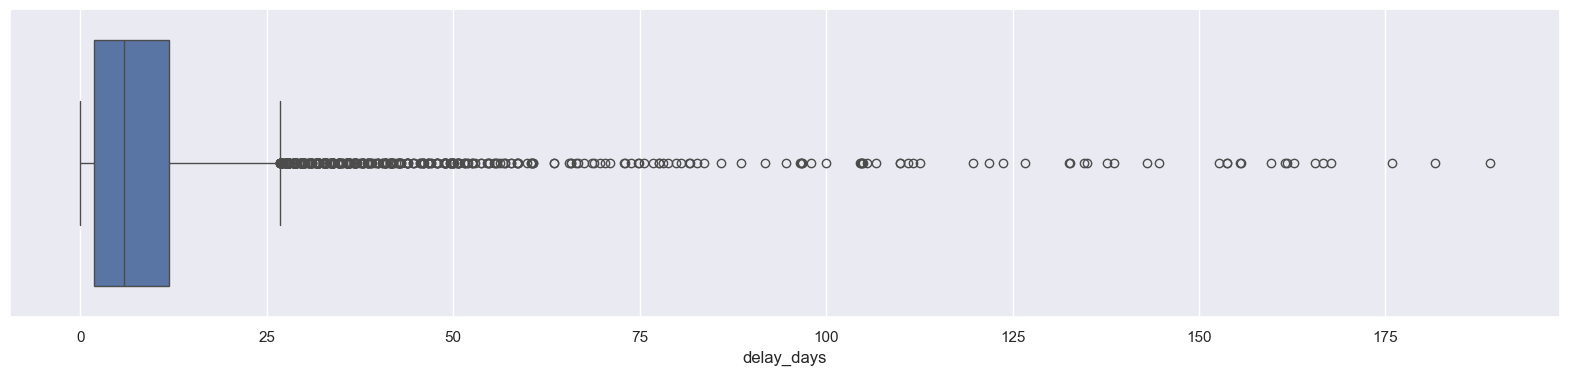

In [119]:
sns.set(rc = {'figure.figsize' : (20, 4)})
sns.boxplot(x=undelivered_orders.delay_days) 
plt.savefig("output.png", dpi=100, bbox_inches="tight")
plt.show()

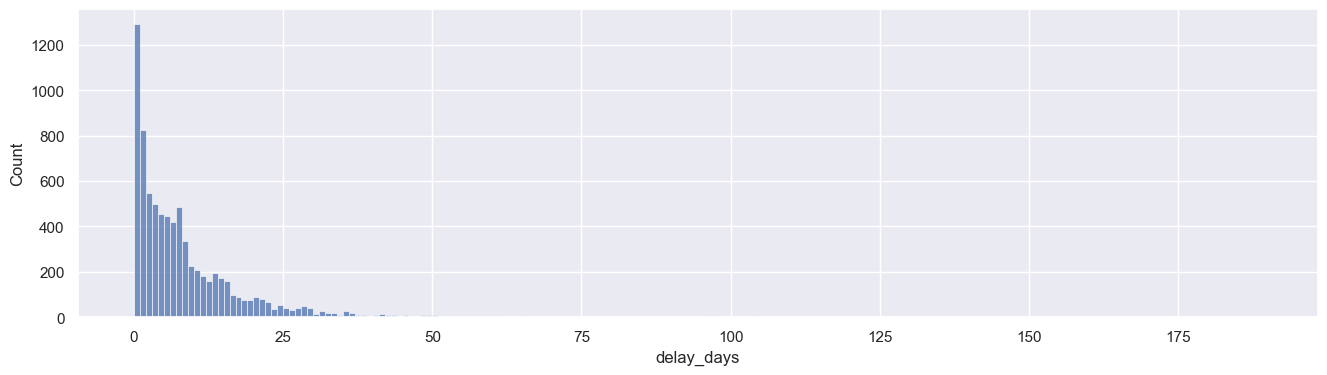

In [120]:
sns.set(rc = {'figure.figsize' : (16, 4)})
sns.histplot(undelivered_orders['delay_days'])
plt.savefig("output.png", dpi=100, bbox_inches="tight")
plt.show()

В среднем задержка доставки около 10 дней. Половину заказов доставляют не больше, чем через 6 дней после обещанной даты. 75 % задержек не превышает 12 дней. Но иногда и по полгода люди ждут свои заказы. 

Вопрос в том, что считать просто задержкой, а что недоставленным товаром. 
Допустим, мы смотрим в конце каждого месяца. Тогда заказы, которые д.б. доставлены в этом месяце (estimated_delivery_year_month), пусть и с задержкой, но могут быть доставлены в этом месяце. 

А если заказ не был доставлен в обещанном месяце, то будем считать его недоставленным. 
И я бы считала заказ доставленным, если задержка не больше 1 дня. 

In [122]:
# отфильтруем заказы, которые доставили с задержкой меньше чем 2 суток 

undelivered_orders = undelivered_orders\
.query('delay_days >= 2 or order_delivered_customer_date.isna()') 

# теперь оставим только те заказы, которые не доставили в месяц обещанной даты:
undelivered_orders = undelivered_orders\
.query('(order_delivered_customer_date.dt.to_period("M") > estimated_delivery_year_month) or (order_delivered_customer_date.isna())') 

undelivered_orders

order_id                       customer_id  \
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
20     203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
44     ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
58     a685d016c8a26f71a0bb67821070e398  911e4c37f5cafe1604fe6767034bf1ae   
103    0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
...                                 ...                               ...   
99313  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
99348  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   
99423  38e9133ce29f6bbe35aed9c3863dce01  ad312389a098ceff46ce92c4595c06d0   

      order_status order_purchase_timestamp   order_approved_at  \
6         invoiced      2017-04-11 12:22:08 2017-04-13 13:25:17   
20       delivered      2017-09-18 14:31:30 2017-09-19 04:04:09   
44         shipped      2018-06-04 16:44:48 2018-06-05 04:31:18   
58       delivered      2017-03-13 18:14:36 2017-03-13 18:14:36   
103       invoiced      2018-08-03 17:44:42 2018-08-07 06:15:14   
...            ...                      ...                 ...   
99313   processing      2018-01-05 23:07:24 2018-01-09 07:18:05   
99347     canceled      2018-09-06 18:45:47                 NaT   
99348  unavailable      2017-08-23 16:28:04 2017-08-28 15:44:47   
99415  unavailable      2017-10-10 10:50:03 2017-10-14 18:35:57   
99423    delivered      2017-10-12 20:54:11 2017-10-14 03:28:24   

      order_delivered_carrier_date order_delivered_customer_date  \
6                              NaT                           NaT   
20             2017-10-06 17:50:03           2017-10-09 22:23:46   
44             2018-06-05 14:32:00                           NaT   
58             2017-03-22 14:03:09           2017-04-06 13:37:16   
103                            NaT                           NaT   
...                            ...                           ...   
99313                          NaT                           NaT   
99347                          NaT                           NaT   
99348                          NaT                           NaT   
99415                          NaT                           NaT   
99423          2017-10-17 17:04:42           2017-11-21 17:06:59   

      order_estimated_delivery_date estimated_delivery_year_month  delay_days  
6                        2017-05-09                       2017-05         NaN  
20                       2017-09-28                       2017-09   11.933171  
44                       2018-06-28                       2018-06         NaN  
58                       2017-03-30                       2017-03    7.567546  
103                      2018-08-21                       2018-08         NaN  
...                             ...                           ...         ...  
99313                    2018-02-06                       2018-02         NaN  
99347                    2018-09-27                       2018-09         NaN  
99348                    2017-09-15                       2017-09         NaN  
99415                    2017-10-23                       2017-10         NaN  
99423                    2017-10-31                       2017-10   21.713183  

[4938 rows x 10 columns]

In [48]:
undelivered_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1782
order_delivered_customer_date    2965
order_estimated_delivery_date       0
estimated_delivery_year_month       0
delay_days                       2965
dtype: int64

In [123]:
# Итого получилось 4938 недоставленных заказа, если считать недоставленными заказы, полученные позже месяца, 
# в котором заказ должен был быть доставлен.

undelivered_orders.order_id.nunique()

4938

In [124]:
# Сгруппируем их по месяцам и посчитаем среднее

undelivered_orders.groupby(['estimated_delivery_year_month']).agg({'order_id':'count'}).mean()

order_id    189.923077
dtype: float64

# Около 190 заказов в месяц в среднем не доставляется по разным причинам 


Посмотрим, как распределены статусы среди недоставленных заказов 


In [204]:
# Это в разрезе по месяцам:

data = undelivered_orders.groupby(['estimated_delivery_year_month', 'order_status'], as_index=False)[['order_id']].count()
data

estimated_delivery_year_month order_status  order_id
0                         2016-09     canceled         1
1                         2016-10     canceled         3
2                         2016-10    delivered         1
3                         2016-10      shipped         1
4                         2016-11     canceled        10
..                            ...          ...       ...
131                       2018-08  unavailable        22
132                       2018-09     canceled        49
133                       2018-09      shipped         4
134                       2018-10     canceled        12
135                       2018-11     canceled         1

[136 rows x 3 columns]

In [238]:
# А это в целом за весь период:

data = undelivered_orders.groupby('order_status', as_index=False)[['order_id']].count()
data

order_status  order_id
0     approved         2
1     canceled       619
2      created         5
3    delivered      1981
4     invoiced       314
5   processing       301
6      shipped      1107
7  unavailable       609

In [250]:
#объединим статусы approved и created  в other

other = ["approved", "created"]
a = data.query('order_status in @other')['order_id'].agg("sum")
new_row = pd.Series({'order_status': 'other', 'order_id': a})
data_1 = pd.concat([data, pd.DataFrame([new_row])], ignore_index=True).sort_values(['order_id']).reset_index(drop=True)
data_1.drop(data_1.index[[0,1]], inplace=True)
data_1

order_status  order_id
2        other         7
3   processing       301
4     invoiced       314
5  unavailable       609
6     canceled       619
7      shipped      1107
8    delivered      1981

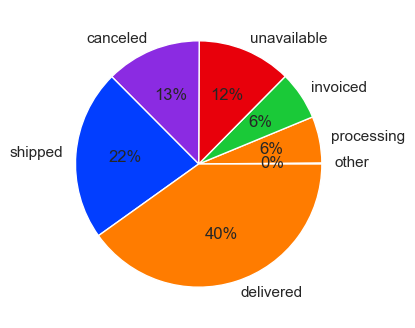

In [253]:
plt.pie(data = data_1, x='order_id', labels='order_status', colors=sns.color_palette('bright')[ 0:5 ], autopct='%.0f%%')
plt.savefig("output.png", dpi=100, bbox_inches="tight")
plt.show() 

### 40% были в итоге доставлены, но позже обещанного срока, даже не в обещанный месяц. 
*Если обещанная дата приходится на конец месяца и задержка больше суток, то заказ попадает в список недоставленных. 
### 13% были отменены
### 12% имеют статус "недоступен" (дальше посмотрим, что это может означать)
### 22% были переданы в логистическую службу и застряли там
### и 12% висят в статусах created, approved, invoiced и processing 

In [245]:
# Недоступен может быть получатель заказа. Тогда товар должен быть отгружен в логистическую компанию.
# Проверим

undelivered_orders[undelivered_orders.order_status == 'unavailable'].isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     609
order_delivered_customer_date    609
order_estimated_delivery_date      0
estimated_delivery_year_month      0
delay_days                       609
dtype: int64

Нет, дело не в клиенте. Все "недоступные" заказы оплачены, но ни один не был доставлен в логистическую службу. 
Видимо, недоступен сам товар.

In [246]:
# Посмотрим, поможет ли нам таблица с товарами

unavailable_orders = undelivered_orders.query('order_status == "unavailable"')['order_id'].tolist()
items_with_unavailable_orders = items.query('order_id in @unavailable_orders')
items_with_unavailable_orders                                              

order_id  order_item_id  \
11558  1a47da1d66c70489c8e35fe2b5433ab7              1   
20902  2fd1c83dd4714cf3cf796fffb6c8de62              1   
20903  2fd1c83dd4714cf3cf796fffb6c8de62              2   
26470  3c3ca08854ca922fe8e9cedfd6841c8a              1   
34411  4dd47e84e6b8ff4a63d0b8425e6d788e              1   
37340  54bb06e1ca86bd99ee2a8d6288bf4ede              1   
97008  dc18a044b56ed174037ca164cdf2e921              1   

                             product_id                         seller_id  \
11558  eba7488e1c67729f045ab43fac426f2e  620c87c171fb2a6dd6e8bb4dec959fc6   
20902  17c7ec33a1657924ad493e6978b4bf91  3d01d1c414c44b5943a09619ff3853cb   
20903  966a067b38634929844120e39b1576bc  61f159ef6da2d441951d2c0efa719362   
26470  ac6c24af9f913c9375a3ea77883bda6e  5206cc4bc2297c833e6061c49bf9c43f   
34411  2aa489c905e1d41d8c716a6d6912d8c2  620c87c171fb2a6dd6e8bb4dec959fc6   
37340  bef13288a0f8b26d763411ced1dfa268  cf281cf8b7affbdfe751b29cc85580e1   
97008  faa268ecc8a8434cb4ebee091b3222d6  f0563bacf40c311f1c4d3d6b67b8a7a7   

      shipping_limit_date    price  freight_value  
11558 2016-10-11 18:53:48   249.90          20.85  
20902 2016-10-10 15:55:42    99.00           9.12  
20903 2016-10-10 15:55:41    59.99          24.08  
26470 2016-10-12 13:21:35    35.00          10.96  
34411 2016-10-11 01:09:09   299.90          13.68  
37340 2016-10-29 09:43:46    64.90          25.33  
97008 2016-10-21 16:18:52  1199.00          28.78

В таблице items нашлось только 6 заказов со статусом unavailable. 
Причём дата доставки в логистику есть, и она явно не на 2 года спланирована. Но почему-то эти товары так и не были отправлены продавцом. Заказ 2fd1c83dd4714cf3cf796fffb6c8de62 включает 2 товара от разных продавцов. Может, это является проблемой для доставки конкретно этого заказа. Но он такой один. 

Куда пропали остальные 603 заказа? Может быть, недоступны стали продавцы, которые продавали заказанный товар?

### Исходя из этого анализа, я бы порекомендовала компании пересмотреть расчёт обещанных дат доставки заказов до клиента. Так как 75 % задержек не превышает 12 дней. А остальные почти 25% - 50 дней. 
### Во-первых, стоит посмотреть, что за продавцы, почему у них такие задержки и можно ли их сократить. И если нельзя, то сделать разные алгоритмы расчёта дат доставки для разных продавцов или разных товаров. И тогда количество недоставленных заказов уменьшиться как минимум процентов на 30.  

# 3. По каждому товару определить, в какой день недели товар чаще всего покупается

Полагаю, здесь под "покупается" продакт-менеджер имел в виду день формирования заказа.

In [256]:
# Из времени заказа выделим день недели

ordered_items['day_of_week'] = ordered_items.order_purchase_timestamp.dt.day_name()
ordered_items

order_id order_purchase_timestamp  \
0       e481f51cbdc54678b7cc49136f2d6af7      2017-10-02 10:56:33   
1       53cdb2fc8bc7dce0b6741e2150273451      2018-07-24 20:41:37   
2       47770eb9100c2d0c44946d9cf07ec65d      2018-08-08 08:38:49   
3       949d5b44dbf5de918fe9c16f97b45f8a      2017-11-18 19:28:06   
4       ad21c59c0840e6cb83a9ceb5573f8159      2018-02-13 21:18:39   
...                                  ...                      ...   
113420  63943bddc261676b46f01ca7ac2f7bd8      2018-02-06 12:58:58   
113421  83c1379a015df1e13d02aae0204711ab      2017-08-27 14:46:43   
113422  11c177c8e97725db2631073c19f07b62      2018-01-08 21:28:27   
113423  11c177c8e97725db2631073c19f07b62      2018-01-08 21:28:27   
113424  66dea50a8b16d9b4dee7af250b4be1a5      2018-03-08 20:57:30   

                              product_id day_of_week  
0       87285b34884572647811a353c7ac498a      Monday  
1       595fac2a385ac33a80bd5114aec74eb8     Tuesday  
2       aa4383b373c6aca5d8797843e5594415   Wednesday  
3       d0b61bfb1de832b15ba9d266ca96e5b0    Saturday  
4       65266b2da20d04dbe00c5c2d3bb7859e     Tuesday  
...                                  ...         ...  
113420  f1d4ce8c6dd66c47bbaa8c6781c2a923     Tuesday  
113421  b80910977a37536adeddd63663f916ad      Sunday  
113422  d1c427060a0f73f6b889a5c7c61f2ac4      Monday  
113423  d1c427060a0f73f6b889a5c7c61f2ac4      Monday  
113424  006619bbed68b000c8ba3f8725d5409e    Thursday  

[113425 rows x 4 columns]

In [257]:
# и сгруппируем по product_id и дням недели 
     
orders_per_day = ordered_items.groupby(['product_id', 'day_of_week'], as_index=False)\
.agg(number_orders = ('order_id', 'count'))
orders_per_day.sort_values('number_orders', ascending=False)

product_id day_of_week  number_orders
15902  422879e10f46682990de24d770e7f83d   Wednesday             93
36513  99a4788cb24856965c36a24e339b6058      Monday             92
41045  aca2eb7d00ea1a7b8ebd4e68314663af    Thursday             89
41041  aca2eb7d00ea1a7b8ebd4e68314663af      Friday             87
41046  aca2eb7d00ea1a7b8ebd4e68314663af     Tuesday             85
...                                 ...         ...            ...
24013  642369377615febc7fa89e4c8df5110e    Thursday              1
24018  642a40d4d73b4b2604968937de13634a      Sunday              1
24022  642e125cbc752b4eeb8faf442319c39f    Thursday              1
24025  64315bd8c0c47303179dd2e25b579d00    Saturday              1
61229  fffe9eeff12fcbd74a2f2b007dde0c58   Wednesday              1

[61230 rows x 3 columns]

In [259]:
# Теперь можно подставить интересующий нас товар и посмотреть недельный расклад. 

item = '422879e10f46682990de24d770e7f83d'
item_dow = orders_per_day.query('product_id == @item').sort_values('number_orders', ascending=False)
item_dow

product_id day_of_week  number_orders
15902  422879e10f46682990de24d770e7f83d   Wednesday             93
15900  422879e10f46682990de24d770e7f83d    Thursday             79
15896  422879e10f46682990de24d770e7f83d      Friday             77
15901  422879e10f46682990de24d770e7f83d     Tuesday             67
15897  422879e10f46682990de24d770e7f83d      Monday             64
15898  422879e10f46682990de24d770e7f83d    Saturday             57
15899  422879e10f46682990de24d770e7f83d      Sunday             47

In [251]:
# Для получения таблицы только с днями недели, когда товар покупается чаще всего, добавим ещё одну колонку, 
# где будут максимальные значения кол-ва заказов в день в разрезе по товарам 

orders_per_day['day_with_most_frequency'] = orders_per_day.groupby('product_id')['number_orders'].transform('max')
orders_per_day.sort_values('day_with_most_frequency', ascending=False)

product_id day_of_week  number_orders  \
15898  422879e10f46682990de24d770e7f83d    Saturday             57   
15896  422879e10f46682990de24d770e7f83d      Friday             77   
15902  422879e10f46682990de24d770e7f83d   Wednesday             93   
15900  422879e10f46682990de24d770e7f83d    Thursday             79   
15899  422879e10f46682990de24d770e7f83d      Sunday             47   
...                                 ...         ...            ...   
26932  706b14052b57d3bc3b9eb631ac7ab443     Tuesday              1   
26933  706f09bf92fd217b4c764327c0a17ace      Friday              1   
26934  7070d77d89af4f2865ff26b1323312ed     Tuesday              1   
26935  707ad2b2f447c0b9d0a7da2f8e7621b3      Friday              1   
61229  fffe9eeff12fcbd74a2f2b007dde0c58   Wednesday              1   

       day_with_most_frequency  
15898                       93  
15896                       93  
15902                       93  
15900                       93  
15899                       93  
...                        ...  
26932                        1  
26933                        1  
26934                        1  
26935                        1  
61229                        1  

[61230 rows x 4 columns]

In [252]:
# Уберу лишние строки и колонки

most_frequent_oreders = orders_per_day\
.query('number_orders == day_with_most_frequency')[['product_id', 'day_of_week', 'day_with_most_frequency']]
most_frequent_oreders.sort_values('day_with_most_frequency', ascending=False)

product_id day_of_week  day_with_most_frequency
15902  422879e10f46682990de24d770e7f83d   Wednesday                       93
36513  99a4788cb24856965c36a24e339b6058      Monday                       92
41045  aca2eb7d00ea1a7b8ebd4e68314663af    Thursday                       89
20127  53b36df67ebb7c41585e8d54d6772e08     Tuesday                       76
13537  389d119b48cf3043d311335e499d9c6b    Thursday                       67
...                                 ...         ...                      ...
23554  6249107c28285443c430b2663f3e49db      Sunday                        1
23553  62487ad072596c457fd65db240a755b8     Tuesday                        1
23552  62487ad072596c457fd65db240a755b8      Monday                        1
23551  624846a50026c57927e1156335b120f6    Thursday                        1
61229  fffe9eeff12fcbd74a2f2b007dde0c58   Wednesday                        1

[42705 rows x 3 columns]

In [253]:
most_frequent_oreders.product_id.nunique()

32951

Как видим, количество строк больше количества уникальных товаров, потому что в некоторые дни недели товар заказывали с одинаково высокой частотой (или просто с одинаковой частотой, 1 раз, например). 

In [254]:
# Как, например, этот:

most_frequent_oreders.query('product_id == "35afc973633aaeb6b877ff57b2793310"')

product_id day_of_week  day_with_most_frequency
12816  35afc973633aaeb6b877ff57b2793310      Monday                       31
12819  35afc973633aaeb6b877ff57b2793310    Thursday                       31

# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

"внутри месяца может быть не целое количество недель. И внутри метрики это нужно учесть"

Не буду менять логику: человек покупку совершил, если оплатил заказ (есть время подтверждения оплаты). Значит, дата покупки - это order_approved_at. 

In [260]:
# Для объединённой таблицы из orders возьмём id заказа, позаказный идентификатор пользователя и order_approved_at. 
# Из таблицы с пользователями: позаказный идентификатор пользователя и уникальный идентификатор пользователя
    
user_orders = orders[['order_id', 'customer_id', 'order_approved_at']]\
.merge(customers[['customer_id', 'customer_unique_id']], how='left', on='customer_id')
user_orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

        order_approved_at                customer_unique_id  
0     2017-10-02 11:07:15  7c396fd4830fd04220f754e42b4e5bff  
1     2018-07-26 03:24:27  af07308b275d755c9edb36a90c618231  
2     2018-08-08 08:55:23  3a653a41f6f9fc3d2a113cf8398680e8  
3     2017-11-18 19:45:59  7c142cf63193a1473d2e66489a9ae977  
4     2018-02-13 22:20:29  72632f0f9dd73dfee390c9b22eb56dd6  
...                   ...                               ...  
99436 2017-03-09 09:54:05  6359f309b166b0196dbf7ad2ac62bb5a  
99437 2018-02-06 13:10:37  da62f9e57a76d978d02ab5362c509660  
99438 2017-08-27 15:04:16  737520a9aad80b3fbbdad19b66b37b30  
99439 2018-01-08 21:36:21  5097a5312c8b157bb7be58ae360ef43c  
99440 2018-03-09 11:20:28  60350aa974b26ff12caad89e55993bd6  

[99441 rows x 4 columns]

In [261]:
# Удалим пустые ячейки, потому что неоплаченный заказ - это не покупка 

user_orders = user_orders.dropna()
user_orders.isna().sum()

order_id              0
customer_id           0
order_approved_at     0
customer_unique_id    0
dtype: int64

In [262]:
# Создадим 2 колонки: 1) извлечём месяц из даты потверждения платежа

user_orders['order_approved_year_month'] = user_orders.order_approved_at.dt.to_period("M")

user_orders.sort_values('order_approved_year_month')

order_id                       customer_id  \
30710  bfbd0f9bdef84302105ad712db648a6c  86dc2ffce2dfff336de2f386a786e574   
89768  119d2d80c921d5b4806a1b19b4e8c531  e15daad9efaafb0d4d10043c9ca77e7b   
71854  5cc475c7c03290048eb2e742cd64cb5e  75e8f990b9e289013b1d092614b52487   
10542  48c43415ea1c4af9afa92542183b6e55  5589151bd114970188a1141fbd5c8d25   
38800  4b038a7f8dfc36755eca741381e379e3  e53edc46664edce7794d86baca23f75b   
...                                 ...                               ...   
23377  fcdaba27fd62777362e818998aa76b94  ac547427f9b41bb8d04e4d0c01ae1078   
80965  eda6f38dade9e617edc1883e14094491  a63dbfab3ef9b3039729c1c73ce56cfc   
23396  ceb0508b7d0cebf8cd0cf1052322da3c  c4e0a16af80a051c0641f0bd76622c7c   
27811  20914c76989e5eac4e2675de44f7275a  6f674b7499f63f1fccdb6a1e75bd3de1   
62360  54282e97f61c23b78330c15b154c867d  4b7decb9b58e2569548b8b4c8e20e8d7   

        order_approved_at                customer_unique_id  \
30710 2016-09-15 12:16:38  830d5b7aaa3b6f1e9ad63703bec97d23   
89768 2016-10-07 19:29:12  a1b3368fc2fbaee34a19608fc1eb4a4b   
71854 2016-10-05 03:10:31  2bf93b9956e26356b52f5d426c7801de   
10542 2016-10-10 18:02:22  9783afad41afa667522bf03656c516f3   
38800 2016-10-10 12:03:31  e93d7ba71f9edaa1360d2d16e8a95783   
...                   ...                               ...   
23377 2018-08-25 22:55:11  72af58d63ff7b96ab0f296e553841def   
80965 2018-08-03 06:04:12  5b23e3a673f41c47a1cd5093f7843d9a   
23396 2018-08-01 09:15:11  a2c484052f03bb5d2533b1429eb938df   
27811 2018-08-22 03:35:09  89f5cc69eed40bff0b1fe35ad25d81ac   
62360 2018-09-03 17:40:06  ff22e30958c13ffe219db7d711e8f564   

      order_approved_year_month  
30710                   2016-09  
89768                   2016-10  
71854                   2016-10  
10542                   2016-10  
38800                   2016-10  
...                         ...  
23377                   2018-08  
80965                   2018-08  
23396                   2018-08  
27811                   2018-08  
62360                   2018-09  

[99281 rows x 5 columns]

In [263]:
# Вторая колонка - сколько недель в каждом месяце.  

user_orders['weeks'] = round((user_orders.order_approved_year_month.dt.days_in_month / 7), 2)
user_orders.sort_values('order_approved_year_month')

order_id                       customer_id  \
30710  bfbd0f9bdef84302105ad712db648a6c  86dc2ffce2dfff336de2f386a786e574   
89768  119d2d80c921d5b4806a1b19b4e8c531  e15daad9efaafb0d4d10043c9ca77e7b   
71854  5cc475c7c03290048eb2e742cd64cb5e  75e8f990b9e289013b1d092614b52487   
10542  48c43415ea1c4af9afa92542183b6e55  5589151bd114970188a1141fbd5c8d25   
38800  4b038a7f8dfc36755eca741381e379e3  e53edc46664edce7794d86baca23f75b   
...                                 ...                               ...   
23377  fcdaba27fd62777362e818998aa76b94  ac547427f9b41bb8d04e4d0c01ae1078   
80965  eda6f38dade9e617edc1883e14094491  a63dbfab3ef9b3039729c1c73ce56cfc   
23396  ceb0508b7d0cebf8cd0cf1052322da3c  c4e0a16af80a051c0641f0bd76622c7c   
27811  20914c76989e5eac4e2675de44f7275a  6f674b7499f63f1fccdb6a1e75bd3de1   
62360  54282e97f61c23b78330c15b154c867d  4b7decb9b58e2569548b8b4c8e20e8d7   

        order_approved_at                customer_unique_id  \
30710 2016-09-15 12:16:38  830d5b7aaa3b6f1e9ad63703bec97d23   
89768 2016-10-07 19:29:12  a1b3368fc2fbaee34a19608fc1eb4a4b   
71854 2016-10-05 03:10:31  2bf93b9956e26356b52f5d426c7801de   
10542 2016-10-10 18:02:22  9783afad41afa667522bf03656c516f3   
38800 2016-10-10 12:03:31  e93d7ba71f9edaa1360d2d16e8a95783   
...                   ...                               ...   
23377 2018-08-25 22:55:11  72af58d63ff7b96ab0f296e553841def   
80965 2018-08-03 06:04:12  5b23e3a673f41c47a1cd5093f7843d9a   
23396 2018-08-01 09:15:11  a2c484052f03bb5d2533b1429eb938df   
27811 2018-08-22 03:35:09  89f5cc69eed40bff0b1fe35ad25d81ac   
62360 2018-09-03 17:40:06  ff22e30958c13ffe219db7d711e8f564   

      order_approved_year_month  weeks  
30710                   2016-09   4.29  
89768                   2016-10   4.43  
71854                   2016-10   4.43  
10542                   2016-10   4.43  
38800                   2016-10   4.43  
...                         ...    ...  
23377                   2018-08   4.43  
80965                   2018-08   4.43  
23396                   2018-08   4.43  
27811                   2018-08   4.43  
62360                   2018-09   4.29  

[99281 rows x 6 columns]

Сентябрь 2016г - неполный месяц. Пожалуй, я его удалю. Сентябрь 2018 г. какой-то странный. 
Данные есть до 17 октября, а последняя дата оплаты 3 сент. 2018г., она же единственная в этом сентябре. 
Думаю, стоит и этот месяц удалить.

In [264]:
user_orders = user_orders.query('"2016-09" < order_approved_year_month < "2018-09"')
user_orders.sort_values('order_approved_year_month')

order_id                       customer_id  \
93696  c4f710df20f7d1500da1aef81a993f65  4b671f05b6eb9dc1d2c1bae9c8c78536   
24438  59f26737bbeea8142a7e982cfce13e7a  e64d63f1e2d292e774d451d7b55f711d   
58656  50013835d7b14aefb452825864d3e414  66ab9fd5f2a463fcfa0995c05f46680c   
75082  75fb23d26903b71ce3dd550ae22d2cc1  3c6484a7438cd35dcc54f53f4b945829   
46499  9aa3197e4887919fde0307fc23601d7a  31a4ecf0bd3ea9436b7132bac1a1bdb3   
...                                 ...                               ...   
80956  a83cf2c3eb9eb4370ba4d38c591fab3d  2256812884cb4b36961426f49b81cf09   
80957  772bb5d1c259f2731fb87d079c3808f0  ce97fa320a9043140d221b5ade94c617   
23377  fcdaba27fd62777362e818998aa76b94  ac547427f9b41bb8d04e4d0c01ae1078   
80850  59e6562672571d67f137e34fbb297c93  9d19adf5da1a281e0762fbbaba463eca   
27811  20914c76989e5eac4e2675de44f7275a  6f674b7499f63f1fccdb6a1e75bd3de1   

        order_approved_at                customer_unique_id  \
93696 2016-10-10 16:02:37  0ecf7f65b5ff3b9e61b637e59f495e0a   
24438 2016-10-10 13:01:33  e6a1d274cbba12da4cd29eb462b34be5   
58656 2016-10-06 15:53:12  1ab766d3d553649d7d8c7e2bb60f5c9d   
75082 2016-10-10 12:02:45  7c6157bc4c2bae550d37b6fc445db0d5   
46499 2016-10-06 16:06:59  24c0806a2407ad1f14b1323849bd246c   
...                   ...                               ...   
80956 2018-08-17 03:09:50  cd47c9f9f1ff7a1cd5a0538dd58a4558   
80957 2018-08-07 04:10:24  f6c5eb8f3ab9bb4cd005e895d6509d58   
23377 2018-08-25 22:55:11  72af58d63ff7b96ab0f296e553841def   
80850 2018-08-20 11:35:18  fd2950e33648943251be2604ef88b24f   
27811 2018-08-22 03:35:09  89f5cc69eed40bff0b1fe35ad25d81ac   

      order_approved_year_month  weeks  
93696                   2016-10   4.43  
24438                   2016-10   4.43  
58656                   2016-10   4.43  
75082                   2016-10   4.43  
46499                   2016-10   4.43  
...                         ...    ...  
80956                   2018-08   4.43  
80957                   2018-08   4.43  
23377                   2018-08   4.43  
80850                   2018-08   4.43  
27811                   2018-08   4.43  

[99279 rows x 6 columns]

In [265]:
# Сгруппируем по пользователям и по месяцам и посчитаем кол-во сделанных заказов в месяц 

purchases_per_week = user_orders.groupby(['customer_unique_id', 'order_approved_year_month', 'weeks'], as_index=False)\
.agg({'order_id':'count'})

# Разделим кол-во заказов на кол-во недель
purchases_per_week['purchases_per_week'] = purchases_per_week.order_id / purchases_per_week.weeks

purchases_per_week.sort_values('purchases_per_week', ascending=False)

customer_unique_id order_approved_year_month  weeks  \
7316   12f5d6e1cbf93dafd9dcc19095df0b3d                   2017-01   4.43   
23910  3e43e6105506432c953e165fb2acf44c                   2018-02   4.00   
69300  b4e4f24de1e8725b74e4a1f4975116ed                   2018-02   4.00   
62113  a239b8e2fbce33780f1f1912e2ee5275                   2017-02   4.00   
14471  25a560b9a6006157838aab1bdbd68624                   2017-04   4.29   
...                                 ...                       ...    ...   
40853  6a88124470b2dfdcd14d76a86778eb1a                   2017-05   4.43   
40855  6a8a24e593bae849d77f65cae0afd180                   2018-08   4.43   
40856  6a8b7d9797f91b35bd7c2400e3e3fa30                   2018-05   4.43   
40857  6a8ba6d38bf76b702054d6fadc3664ba                   2018-08   4.43   
97909  ffffd2657e2aad2907e67c3e9daecbeb                   2017-05   4.43   

       order_id  purchases_per_week  
7316          6            1.354402  
23910         4            1.000000  
69300         4            1.000000  
62113         4            1.000000  
14471         4            0.932401  
...         ...                 ...  
40853         1            0.225734  
40855         1            0.225734  
40856         1            0.225734  
40857         1            0.225734  
97909         1            0.225734  

[97910 rows x 5 columns]

In [267]:
purchases_per_week.describe()

weeks      order_id  purchases_per_week
count  97910.000000  97910.000000        97910.000000
mean       4.350865      1.013982            0.233266
std        0.123981      0.124099            0.029659
min        4.000000      1.000000            0.225734
25%        4.290000      1.000000            0.225734
50%        4.430000      1.000000            0.225734
75%        4.430000      1.000000            0.233100
max        4.430000      6.000000            1.354402

75% клиентов совершают 0,23 покупки в неделю или одну покупку в месяц. Максимум - 1,35 покупок в неделю (6 покупок в месяц). 

# 6. Построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 

R - (Recency) время от последней покупки пользователя до текущей даты,

F - (Frequency) суммарное количество покупок у пользователя за всё время, (я бы сделала кол-во покупок в мес., но я уже просто не успеваю думать. Пожэтому делаю, как предложено - тотал за всё время.

M - (Monetary) сумма покупок за всё время.

Покупка: всё также order_approved_at —  время подтверждения оплаты заказа.

Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

In [277]:
# В задании сказано: "за всё время", 
# поэтому период и текущую дату определю по датам создания заказов, т.к. это экстремальные даты. 

print('Purchases from {} to {}'.format(orders['order_purchase_timestamp'].min(),
                                    orders['order_purchase_timestamp'].max()))

Purchases from 2016-09-04 21:15:19 to 2018-10-17 17:30:18


Период - чуть больше 2 лет и 1 мес.

In [278]:
period = round((orders['order_purchase_timestamp'].max() - orders['order_purchase_timestamp'].min()) / np.timedelta64(1, 'D'), 0)
period

773.0

In [279]:
# " I am doing in real time by setting the NOW date at one day after the last purchase. 
# This date will be used as a reference to calculate the Recency score." 
# Честно, пока не понимаю, почему не взять за текущую дату последнюю дату датасета/ Но сделаю, как предлагают.

NOW = pd.to_datetime(orders.order_purchase_timestamp.max() + dt.timedelta(days=1)) 
# NOW = format(NOW, '%Y-%m-%d')
NOW

Timestamp('2018-10-18 17:30:18')

In [280]:
# Создам нужный датафрейм. Т.к. у нас есть в оплаченных отменённые заказы, уберу их, потому что они не принесли деньги.

base = customers[['customer_unique_id', 'customer_id']]\
.merge(orders.query('order_status != "canceled"')[['customer_id', 'order_approved_at', 'order_id']], on='customer_id')\
.merge(items[['order_id', 'product_id', 'price']], how='left', on='order_id')
base

customer_unique_id                       customer_id  \
0       861eff4711a542e4b93843c6dd7febb0  06b8999e2fba1a1fbc88172c00ba8bc7   
1       290c77bc529b7ac935b93aa66c333dc3  18955e83d337fd6b2def6b18a428ac77   
2       060e732b5b29e8181a18229c7b0b2b5e  4e7b3e00288586ebd08712fdd0374a03   
3       259dac757896d24d7702b9acbbff3f3c  b2b6027bc5c5109e529d4dc6358b12c3   
4       345ecd01c38d18a9036ed96c73b8d066  4f2d8ab171c80ec8364f7c12e35b23ad   
...                                  ...                               ...   
112714  1a29b476fee25c95fbafc67c5ac95cf8  17ddf5dd5d51696bb3d7c6291687be6f   
112715  d52a67c98be1cf6a5c84435bd38d095d  e7b71a9017aa05c9a7fd292d714858e8   
112716  e9f50caf99f032f0bf3c55141f019d99  5e28dfe12db7fb50a4b2f691faecea5e   
112717  73c2643a0a458b49f58cea58833b192e  56b18e2166679b8a959d72dd06da27f9   
112718  84732c5050c01db9b23e19ba39899398  274fa6071e5e17fe303b9748641082c8   

         order_approved_at                          order_id  \
0      2017-05-16 15:22:12  00e7ee1b050b8499577073aeb2a297a1   
1      2018-01-12 20:58:32  29150127e6685892b6eab3eec79f59c7   
2      2018-05-20 16:19:10  b2059ed67ce144a36e2aa97d2c9e9ad2   
3      2018-03-13 17:29:19  951670f92359f4fe4a63112aa7306eba   
4      2018-07-29 10:10:09  6b7d50bd145f6fc7f33cebabd7e49d0f   
...                    ...                               ...   
112714 2018-04-07 16:08:45  6760e20addcf0121e9d58f2f1ff14298   
112715 2018-04-04 08:35:12  9ec0c8947d973db4f4e8dcf1fbfa8f1b   
112716 2018-04-08 20:30:03  fed4434add09a6f332ea398efd656a5c   
112717 2017-11-03 21:31:20  e31ec91cea1ecf97797787471f98a8c2   
112718 2017-12-19 18:50:39  28db69209a75e59f20ccbb5c36a20b90   

                              product_id   price  
0       a9516a079e37a9c9c36b9b78b10169e8  124.99  
1       4aa6014eceb682077f9dc4bffebc05b0  289.00  
2       bd07b66896d6f1494f5b86251848ced7  139.94  
3       a5647c44af977b148e0a3a4751a09e2e  149.94  
4       9391a573abe00141c56e38d84d7d5b3b  230.00  
...                                  ...     ...  
112714  ccb4503d9d43d245d3b295d0544f988b   74.90  
112715  9ede6b0570a75a4b9de4f383329f99ee  114.90  
112716  7a5d2e1e131a860ae7d18f6fffa9d689   37.00  
112717  f819f0c84a64f02d3a5606ca95edd272  689.00  
112718  017692475c1c954ff597feda05131d73   13.99  

[112719 rows x 6 columns]

In [281]:
base.isna().sum()

customer_unique_id      0
customer_id             0
order_approved_at      20
order_id                0
product_id            611
price                 611
dtype: int64

In [282]:
# удалю пустые ячейки - это неоплаченные заказы и те недоступные, которых даже нет в датасете items 
base = base.dropna()
base.isna().sum()

customer_unique_id    0
customer_id           0
order_approved_at     0
order_id              0
product_id            0
price                 0
dtype: int64

In [283]:
# найдём разницу между датами покупок и текущей датой

base['dif_days'] = round((NOW - base.order_approved_at) / np.timedelta64(1, 'D'), 0)
base


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


customer_unique_id                       customer_id  \
0       861eff4711a542e4b93843c6dd7febb0  06b8999e2fba1a1fbc88172c00ba8bc7   
1       290c77bc529b7ac935b93aa66c333dc3  18955e83d337fd6b2def6b18a428ac77   
2       060e732b5b29e8181a18229c7b0b2b5e  4e7b3e00288586ebd08712fdd0374a03   
3       259dac757896d24d7702b9acbbff3f3c  b2b6027bc5c5109e529d4dc6358b12c3   
4       345ecd01c38d18a9036ed96c73b8d066  4f2d8ab171c80ec8364f7c12e35b23ad   
...                                  ...                               ...   
112714  1a29b476fee25c95fbafc67c5ac95cf8  17ddf5dd5d51696bb3d7c6291687be6f   
112715  d52a67c98be1cf6a5c84435bd38d095d  e7b71a9017aa05c9a7fd292d714858e8   
112716  e9f50caf99f032f0bf3c55141f019d99  5e28dfe12db7fb50a4b2f691faecea5e   
112717  73c2643a0a458b49f58cea58833b192e  56b18e2166679b8a959d72dd06da27f9   
112718  84732c5050c01db9b23e19ba39899398  274fa6071e5e17fe303b9748641082c8   

         order_approved_at                          order_id  \
0      2017-05-16 15:22:12  00e7ee1b050b8499577073aeb2a297a1   
1      2018-01-12 20:58:32  29150127e6685892b6eab3eec79f59c7   
2      2018-05-20 16:19:10  b2059ed67ce144a36e2aa97d2c9e9ad2   
3      2018-03-13 17:29:19  951670f92359f4fe4a63112aa7306eba   
4      2018-07-29 10:10:09  6b7d50bd145f6fc7f33cebabd7e49d0f   
...                    ...                               ...   
112714 2018-04-07 16:08:45  6760e20addcf0121e9d58f2f1ff14298   
112715 2018-04-04 08:35:12  9ec0c8947d973db4f4e8dcf1fbfa8f1b   
112716 2018-04-08 20:30:03  fed4434add09a6f332ea398efd656a5c   
112717 2017-11-03 21:31:20  e31ec91cea1ecf97797787471f98a8c2   
112718 2017-12-19 18:50:39  28db69209a75e59f20ccbb5c36a20b90   

                              product_id   price  dif_days  
0       a9516a079e37a9c9c36b9b78b10169e8  124.99     520.0  
1       4aa6014eceb682077f9dc4bffebc05b0  289.00     279.0  
2       bd07b66896d6f1494f5b86251848ced7  139.94     151.0  
3       a5647c44af977b148e0a3a4751a09e2e  149.94     219.0  
4       9391a573abe00141c56e38d84d7d5b3b  230.00      81.0  
...                                  ...     ...       ...  
112714  ccb4503d9d43d245d3b295d0544f988b   74.90     194.0  
112715  9ede6b0570a75a4b9de4f383329f99ee  114.90     197.0  
112716  7a5d2e1e131a860ae7d18f6fffa9d689   37.00     193.0  
112717  f819f0c84a64f02d3a5606ca95edd272  689.00     349.0  
112718  017692475c1c954ff597feda05131d73   13.99     303.0  

[112093 rows x 7 columns]

In [284]:
# Recency - Время от последней покупки пользователя до текущей даты - это минимальное значение нашей разницы дат
# Frequency - суммарное количество покупок у пользователя за всё время
# Monetary - сумма покупок за всё время.

rfm = base.groupby('customer_unique_id').agg({'dif_days': 'min', 'order_id': 'count', 'price': 'sum'}).reset_index()
rfm.rename(columns={'dif_days': 'recency', 'order_id': 'frequency', 'price': 'monetary'}, inplace=True)
rfm.sort_values('monetary', ascending=False)

customer_unique_id  recency  frequency  monetary
3788   0a0a92112bd4c708ca5fde585afaa872    381.0          8  13440.00
81004  da122df9eeddfedc1dc1f5349a1a690c    563.0          2   7388.00
43937  763c8b1c9c68a0229c42c9fc6f662b93     94.0          4   7160.00
81843  dc4802a71eae9be1dd28f5d788ceb526    613.0          1   6735.00
25902  459bef486812aa25204be022145caa62     84.0          1   6729.00
...                                 ...      ...        ...       ...
76935  cf3839da0d9492ad151690b65f45d800    259.0          1      2.99
70226  bd06ce0e06ad77a7f681f1a4960a3cc6    400.0          1      2.29
18436  317cfc692e3f86c45c95697c61c853a6     54.0          1      2.20
66695  b38211bd797f4fdd81a98b9d1754b606    177.0          1      0.85
80255  d80730c15c647bc8f2ad77c908ba5ca9    176.0          1      0.85

[94976 rows x 4 columns]

In [285]:
rfm.describe()

recency     frequency      monetary
count  94976.000000  94976.000000  94976.000000
mean     288.003990      1.180224    142.085769
std      152.996039      0.620609    216.107543
min       45.000000      1.000000      0.850000
25%      164.000000      1.000000     47.900000
50%      269.000000      1.000000     89.890000
75%      397.000000      1.000000    155.000000
max      763.000000     24.000000  13440.000000

Помним, что 93049 пользователей совершили покупку только один раз. Поэтому статданные не являются сюрпризом. 

В течение последних 44 дней не было покупок вообще. Так и есть: последний оплаченный заказ был в 2018-09-03 17:40:06. И это странно. Возможно, прежде чем выводить rfm, стоило изучить и отладить данный факт. Но я буду иметь дело с тем, что есть. Мне не кажется правильным подгонать датасет, убирая из него месяцы, если я не уверена, что причина в технической неполадке. 

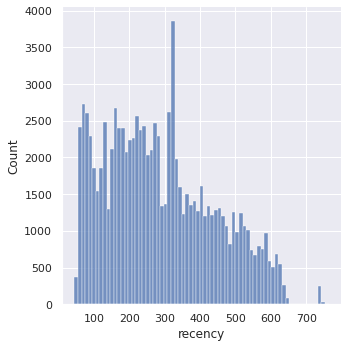

In [286]:
sns.displot(rfm.recency)

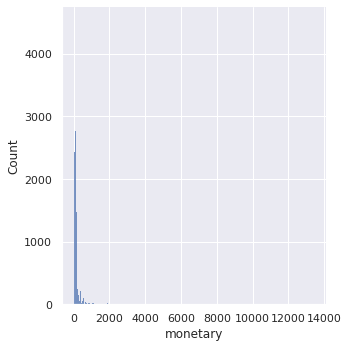

In [287]:
sns.displot(rfm.monetary)

### Создаём кластеры

In [288]:
rfm.frequency.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18,
       20, 21, 24])

Предлагаю для кластеризации recency и monetary использовать квартили. А для frequency, т.к. 75% клиентов сделали по 1 покупке, разбить следующим образом:

1) 1

2) 2-10

3) 9-20

4) > 20

In [289]:
quintiles = rfm[['recency', 'monetary']].quantile([.25, .5, .75]).to_dict()
quintiles

{'recency': {0.25: 164.0, 0.5: 269.0, 0.75: 397.0},
 'monetary': {0.25: 47.9, 0.5: 89.89, 0.75: 155.0}}

In [290]:
def r_score(x):
    if x <= quintiles['recency'][.25]:
        return 4
    elif x <= quintiles['recency'][.5]:
        return 3
    elif x <= quintiles['recency'][.75]:
        return 2
    else:
        return 1

def m_score(x):
    if x <= quintiles['monetary'][.25]:
        return 1
    elif x <= quintiles['monetary'][.5]:
        return 2
    elif x <= quintiles['monetary'][.75]:
        return 3
    else:
        return 4 
    
def f_score(x):
    if x == 1:
        return 1
    elif x <= 10:
        return 2
    elif x <= 20:
        return 3
    else:
        return 4  


In [291]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['monetary'].apply(lambda x: m_score(x))
rfm

customer_unique_id  recency  frequency  monetary  R  F  M
0      0000366f3b9a7992bf8c76cfdf3221e2    161.0          1    129.90  4  1  3
1      0000b849f77a49e4a4ce2b2a4ca5be3f    164.0          1     18.90  4  1  1
2      0000f46a3911fa3c0805444483337064    587.0          1     69.00  1  1  2
3      0000f6ccb0745a6a4b88665a16c9f078    371.0          1     25.99  2  1  1
4      0004aac84e0df4da2b147fca70cf8255    338.0          1    180.00  2  1  4
...                                 ...      ...        ...       ... .. .. ..
94971  fffcf5a5ff07b0908bd4e2dbc735a684    497.0          2   1570.00  1  2  4
94972  fffea47cd6d3cc0a88bd621562a9d061    312.0          1     64.89  2  1  2
94973  ffff371b4d645b6ecea244b27531430a    618.0          1     89.90  1  1  3
94974  ffff5962728ec6157033ef9805bacc48    169.0          1    115.00  3  1  3
94975  ffffd2657e2aad2907e67c3e9daecbeb    533.0          1     56.99  1  1  2

[94976 rows x 7 columns]

In [292]:
# Соединяем все 3 оценки в 1 колонку
rfm['rfm_score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm

customer_unique_id  recency  frequency  monetary  R  F  \
0      0000366f3b9a7992bf8c76cfdf3221e2    161.0          1    129.90  4  1   
1      0000b849f77a49e4a4ce2b2a4ca5be3f    164.0          1     18.90  4  1   
2      0000f46a3911fa3c0805444483337064    587.0          1     69.00  1  1   
3      0000f6ccb0745a6a4b88665a16c9f078    371.0          1     25.99  2  1   
4      0004aac84e0df4da2b147fca70cf8255    338.0          1    180.00  2  1   
...                                 ...      ...        ...       ... .. ..   
94971  fffcf5a5ff07b0908bd4e2dbc735a684    497.0          2   1570.00  1  2   
94972  fffea47cd6d3cc0a88bd621562a9d061    312.0          1     64.89  2  1   
94973  ffff371b4d645b6ecea244b27531430a    618.0          1     89.90  1  1   
94974  ffff5962728ec6157033ef9805bacc48    169.0          1    115.00  3  1   
94975  ffffd2657e2aad2907e67c3e9daecbeb    533.0          1     56.99  1  1   

       M rfm_score  
0      3       413  
1      1       411  
2      2       112  
3      1       211  
4      4       214  
...   ..       ...  
94971  4       124  
94972  2       212  
94973  3       113  
94974  3       313  
94975  2       112  

[94976 rows x 8 columns]

In [293]:
rfm.describe()

recency     frequency      monetary             R             F  \
count  94976.000000  94976.000000  94976.000000  94976.000000  94976.000000   
mean     288.003990      1.180224    142.085769      2.507212      1.124642   
std      152.996039      0.620609    216.107543      1.119955      0.331492   
min       45.000000      1.000000      0.850000      1.000000      1.000000   
25%      164.000000      1.000000     47.900000      2.000000      1.000000   
50%      269.000000      1.000000     89.890000      3.000000      1.000000   
75%      397.000000      1.000000    155.000000      4.000000      1.000000   
max      763.000000     24.000000  13440.000000      4.000000      4.000000   

                  M  
count  94976.000000  
mean       2.498042  
std        1.118782  
min        1.000000  
25%        1.000000  
50%        2.000000  
75%        3.000000  
max        4.000000

### Описание сегментов    

champions: покупали недавно, покупают много, (он у нас 1 такой)))
potential loyalists: покупали недавно, больше 1 раза,
new customers: покупали недавно, 1 раз,
loyal customers: покупают чаще других, но последняя покупка была не так близко,
need attention: покупали больше 1 раза, но последняя покупка была не так близко,
at risk: мы их теряем, купили достаточно давно, но больше 1 раза,
hibernating: уснувшие, возможно, потерянные, купили всего 1 раз и очень давно


In [294]:
segt_map = {
    r'11': 'hibernating',
    r'[1-2][1-4]': 'at risk',
    r'[2-3]1': 'need attention',
    r'3[2-4]': 'loyal customers',
    r'41': 'new customers',
    r'4[2-3]': 'potential loyalists',
    r'44': 'champions'
}



In [295]:
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.sort_values('rfm_score', ascending=False)

customer_unique_id  recency  frequency  monetary  R  F  \
74396  c8460e4251689ba205045f3ea17884a1     70.0         24   4080.00  4  4   
75199  ca77025e7201e3b30c44b472ff346268    139.0         12    806.61  4  3   
37161  63cfc61cee11cbe306bff5857d00bfe4    143.0         11    579.81  4  3   
78495  d3383e8df3cd44cd351aecff92e34627    158.0         12    213.84  4  3   
52349  8d50f5eadf50201ccdcedfb9e2ac8455     59.0         16    729.62  4  3   
...                                 ...      ...        ...       ... .. ..   
9053   182e134f5a24ee479aa38749a5748cb0    410.0          1     25.99  1  1   
68810  b92a6f95096e923d4eaf9192e17d5095    458.0          1     19.99  1  1   
68812  b92ca24fab9d1a01b2a4eb08c858d04e    452.0          1     19.90  1  1   
68814  b92d8ecbc60e7c6176e8f02ec8c909c4    608.0          1     18.90  1  1   
26509  47351f35d6ead07e0f2d39a2adaf73be    400.0          1     33.49  1  1   

       M rfm_score              Segment  
74396  4       444            champions  
75199  4       434  potential loyalists  
37161  4       434  potential loyalists  
78495  4       434  potential loyalists  
52349  4       434  potential loyalists  
...   ..       ...                  ...  
9053   1       111          hibernating  
68810  1       111          hibernating  
68812  1       111          hibernating  
68814  1       111          hibernating  
26509  1       111          hibernating  

[94976 rows x 9 columns]

In [296]:
rfm_share = rfm.groupby('Segment', as_index=False).agg(total =('customer_unique_id', 'count'))
rfm_share['share'] = rfm_share.total/rfm.customer_unique_id.nunique()*100
rfm_share                                                       

Segment  total      share
0              at risk  26210  27.596445
1            champions      1   0.001053
2          hibernating  20897  22.002401
3      loyal customers   3023   3.182909
4       need attention  20847  21.949756
5        new customers  20957  22.065574
6  potential loyalists   3041   3.201862

In [297]:
ax = sns.countplot(rfm.Segment)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [298]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 5)
f_range = range(1, 5)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

In [299]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

# Выводы

Достаточно равномерное распределение параметра Recency

87% клиентов купили 1 раз и 12% - 2 раза.

У нас есть 1 чемпион с парамтрами 444

22% клиентов купили 1 раз и больше года назад
27,5%  покупали последний раз достаточно давно (около года назад и больше), но больше 1 раза
22% купили 1 раз где-то полгода - 9 месяцев назад. 
Лояльных клиентов и потенциально лояльных очень мало (по 3%)


